## Initialization

In [1]:
import numpy as np
import math as m
import cmath as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.linalg import logm, expm

## Experimental values and initialization

In [2]:
# Number of samples
N_samples = int(1E6)

# Distribution of masses in random search. Choose between 'linear', 'log', 'log_0', 'linear_0', 'log_0 + linear_0'
distribution_masses = 'log_0'

# Normalization of the H matrices. Choose between '0', 'maxmass', 'v' or 'tr'
normalization_H = 'maxmass'

# Mass units should be either 'mev' or 'gev'.
masses_order='mev'

# Experimental values are given according to the 2022 Particle Data Group

if masses_order=='mev':

    v = 246E3 / np.sqrt(2)

    mu = 1.23
    #mu = 130000
    mu_std = 0.21

    mc = 620
    #mc = 150000
    mc_std = 17

    mt = 168260
    mt_std = 750

    md = 2.67
    #md = 21000
    md_std = 0.19

    ms = 53.16
    #ms = 24000
    ms_std = 4.61


    mb = 2839
    mb_std = 26
    
    mz = 91187.6

    
if masses_order=='gev':

    v = 246 / np.sqrt(2)

    mu = 1.23E-3
    #mu = 130000
    mu_std = 0.21E-3

    mc = 0.620
    #mc = 150000
    mc_std = 17E-3

    mt = 168.260
    mt_std = 0.750

    md = 2.67E-3
    #md = 21000
    md_std = 0.19E-3

    ms = 53.16E-3
    #ms = 24000
    ms_std = 4.61E-3


    mb = 2.839
    mb_std = 26E-3
    
    
    me = 0.48307E-3
    mmu = 0.101766
    mtau = 1.72856


s12 = 0.22500
s12_std = 0.00067
s13 = 0.00369
s13_std = 0.00011
s23 = 0.04182
s23_std = 0.00085
delta = 1.144
delta_std = 0.027

J = (2 * (mb**2 - md**2) * (mb**2 - ms**2) * (md**2 - ms**2) * (mc**2 - mt**2) * (mc**2 - mu**2) * (mt**2 - mu**2) * \
np.sqrt(1 - s12**2) * (1 - s13**2) * np.sqrt(1 - s23**2) *  np.sin(delta) * s13 * s23 * s12) / (v**12)

In [3]:
def minmax(df):
    
    """Auxiliary function for Shannon entropy"""
    
    return (df-df.min())/(df.max()-df.min())

In [4]:
def cos(x):
    
    """Not the usual cosine. It returns cos() given sin()"""
    
    return np.sqrt(1 - x**2)

## Random search for parameters

In [5]:
def random_parameters(distribution=distribution_masses):
    
    """Function to generate random data on flavor physics parameters: quark masses and CKM parameters"""
    
    np.random.seed(107)
    
    # First step is always CKM
    
    if distribution=='log':
        
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data[:, 3] *= np.pi

        # Up type

        data = np.append(data, np.power(10, np.random.uniform(np.log10(mu), np.log10(mt),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.power(10, np.random.uniform(np.log10(mc), np.log10(mt),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mt, axis=1)  # Broadcasting

        # Down type

        data = np.append(data, np.power(10, np.random.uniform(np.log10(md), np.log10(mb),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.power(10, np.random.uniform(np.log10(ms), np.log10(mb),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mb, axis=1)  # Broadcasting
        
        
    if distribution=='log_0':
        
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data[:, 3] *= np.pi
    
        # Up type

        data = np.append(data, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mt),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mt),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mt, axis=1)  # Broadcasting

        # Down type

        data = np.append(data, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mb),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mb),
                                                              size=(N_samples, 1))), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mb, axis=1)  # Broadcasting
        
        
    if distribution=='linear':
        
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data[:, 3] *= np.pi
    
        # Up type

        data = np.append(data, np.random.uniform(mu, mt, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.random.uniform(mc, mt, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mt, axis=1)  # Broadcasting

        # Down type

        data = np.append(data, np.random.uniform(md, mb, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.random.uniform(ms, mb, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mb, axis=1)  # Broadcasting
        
        
    if distribution=='linear_0':
        
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data = np.random.uniform(-1, 1, size=(N_samples, 4))
        data[:, 3] *= np.pi
    
        # Up type

        data = np.append(data, np.random.uniform(0, mt, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.random.uniform(0, mt, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mt, axis=1)  # Broadcasting

        # Down type

        data = np.append(data, np.random.uniform(0, mb, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.random.uniform(0, mb, size=(N_samples, 1)), axis=1)
        data = np.append(data, np.zeros((N_samples, 1)) + mb, axis=1)  # Broadcasting
        
        
    if distribution=='log_0 + linear_0':
        
        data = np.random.uniform(-1, 1, size=(2*N_samples, 4))
        data = np.random.uniform(-1, 1, size=(2*N_samples, 4))
        data[:, 3] *= np.pi
        
        # LOG
    
        # Up type
        
        data_masses_log = np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mt), 
                                                     size=(N_samples, 1)))

        data_masses_log = np.append(data_masses_log, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mt),
                                                              size=(N_samples, 1))), axis=1)
        data_masses_log = np.append(data_masses_log, np.zeros((N_samples, 1)) + mt, axis=1)  # Broadcasting

        # Down type

        data_masses_log = np.append(data_masses_log, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mb),
                                                              size=(N_samples, 1))), axis=1)
        data_masses_log = np.append(data_masses_log, np.power(10, np.random.uniform(np.log10(1E-1), np.log10(mb),
                                                              size=(N_samples, 1))), axis=1)
        data_masses_log = np.append(data_masses_log, np.zeros((N_samples, 1)) + mb, axis=1)  # Broadcasting
        
        # LINEAR
        
        # Up type

        data_masses_linear = np.random.uniform(0, mt, size=(N_samples, 1))
        data_masses_linear = np.append(data_masses_linear, np.random.uniform(0, mt, size=(N_samples, 1)), axis=1)
        data_masses_linear = np.append(data_masses_linear, np.zeros((N_samples, 1)) + mt, axis=1)  # Broadcasting

        # Down type

        data_masses_linear = np.append(data_masses_linear, np.random.uniform(0, mb, size=(N_samples, 1)), axis=1)
        data_masses_linear = np.append(data_masses_linear, np.random.uniform(0, mb, size=(N_samples, 1)), axis=1)
        data_masses_linear = np.append(data_masses_linear, np.zeros((N_samples, 1)) + mb, axis=1)  # Broadcasting
        
        # Data masses
        
        assert(data_masses_log.shape == data_masses_linear.shape)
        
        data_masses = np.append(data_masses_log, data_masses_linear, axis=0)
        
        # Data
        
        data = np.append(data, data_masses, axis=1)
    
    
    df_new = pd.DataFrame(data, columns=['s12', 's13', 's23', 'delta', 'mu', 'mc', 'mt', 'md', 'ms', 'mb'])
    
    df_new = df_new[(df_new['mu'] < df_new['mc']) & (df_new['md'] < df_new['ms'])]
        
    return df_new

In [6]:
df_parameters = random_parameters()

## Hu and Hd definitions according to the standard parametrization

In [7]:
def up(df, normalization=normalization_H):
    
    """ Input: DataFrame with CKM parameters and quark masses. Output: Array of matrices Hu."""
    
    type_Hu = "cdouble"
    
    # Shape after order
    
    N_samples_ord = df.shape[0]
    
    # Zeros in shape (N_samples_ord, 3, 3)
    
    Hu = np.zeros((N_samples_ord, 3, 3), dtype=type_Hu)
    
    # Populate entries [0,0] and [1,1] with mu and mc
    
    Hu[:, 0, 0] += (df['mu']**2).values
    Hu[:, 1, 1] += (df['mc']**2).values
    Hu[:, 2, 2] += (df['mt']**2).values
    
    # Compute the trace before normalization as a rank-1 array. Shape is (N_samples_ord,)
    
    trace_Hu_bf_norm = np.trace(Hu, axis1=1, axis2=2)
    
    # Normalize
    
    if normalization == '0':
        pass
    
    if normalization == 'maxmass':
    
        Hu[:, 0, 0] = Hu[:, 0, 0] / (df['mt']**2).values
        Hu[:, 1, 1] = Hu[:, 1, 1] / (df['mt']**2).values
        Hu[:, 2, 2] = Hu[:, 2, 2] / (df['mt']**2).values
        
    if normalization == 'v':
    
        Hu[:, 0, 0] = Hu[:, 0, 0] / (v**2)
        Hu[:, 1, 1] = Hu[:, 1, 1] / (v**2)
        Hu[:, 2, 2] = Hu[:, 2, 2] / (v**2)
        
    if normalization == 'tr':
    
        Hu[:, 0, 0] = Hu[:, 0, 0] / trace_Hu_bf_norm
        Hu[:, 1, 1] = Hu[:, 1, 1] / trace_Hu_bf_norm
        Hu[:, 2, 2] = Hu[:, 2, 2] / trace_Hu_bf_norm
        
    # Compute the trace as a rank-1 array. Shape is (N_samples_ord,)
    
    trace_Hu = np.trace(Hu, axis1=1, axis2=2)
    
    # Define a zero matrix, in place of - Tr(A) * Identity. Shape is (N_samples_ord, 3, 3)
    
    identity_tr = np.zeros((N_samples_ord, 3, 3), dtype=type_Hu)
    
    # Populate the entries with the trace using the rank-1 arrays
    
    identity_tr[:, 0, 0] += trace_Hu[:]
    identity_tr[:, 1, 1] += trace_Hu[:]
    identity_tr[:, 2, 2] += trace_Hu[:]
    
    # Traceless array divided by the matrices size, 3

    Hut = Hu - identity_tr / 3
    
    #assert(np.trace(Hut, axis1=1, axis2=2).all() == 0)
    
    return trace_Hu.real, Hut

In [8]:
trHu, Hu_arr = up(df_parameters)

In [9]:
def down(df, normalization=normalization_H):
    
    """ Input: DataFrame with CKM parameters and quark masses. Output: Array of matrices Hd."""
    
    type_Hd_diag = "cdouble"
    type_Hd_complex = "cdouble"
    
    # Shape after order
    
    N_samples_ord = df.shape[0]
    
    # Zeros in shape (N_samples_ord, 3, 3)
    
    Hd_diag = np.zeros((N_samples_ord, 3, 3), dtype=type_Hd_diag)
    
    # Populate entries [0,0] and [1,1] with md and ms
    
    Hd_diag[:, 0, 0] += (df['md']**2).values
    Hd_diag[:, 1, 1] += (df['ms']**2).values
    Hd_diag[:, 2, 2] += (df['mb']**2).values
    
    # Compute the trace before norm as a rank-1 array. Shape is (N_samples_ord,)
    
    trace_Hd_bf_norm = np.trace(Hd_diag, axis1=1, axis2=2)
    
    # Normalize
    
    if normalization=='0':
        pass
    
    if normalization=='maxmass':
    
        Hd_diag[:, 0, 0]  = Hd_diag[:, 0, 0] / (df['mb']**2).values
        Hd_diag[:, 1, 1]  = Hd_diag[:, 1, 1] / (df['mb']**2).values
        Hd_diag[:, 2, 2]  = Hd_diag[:, 2, 2] / (df['mb']**2).values
        
    if normalization == 'v':
    
        Hd_diag[:, 0, 0] = Hd_diag[:, 0, 0] / (v**2)
        Hd_diag[:, 1, 1] = Hd_diag[:, 1, 1] / (v**2)
        Hd_diag[:, 2, 2] = Hd_diag[:, 2, 2] / (v**2)
        
    if normalization=='tr':
    
        Hd_diag[:, 0, 0] = Hd_diag[:, 0, 0] / trace_Hd_bf_norm
        Hd_diag[:, 1, 1] = Hd_diag[:, 1, 1] / trace_Hd_bf_norm
        Hd_diag[:, 2, 2] = Hd_diag[:, 2, 2] / trace_Hd_bf_norm
        
        
    # Compute the trace as a rank-1 array. Shape is (N_samples_ord,)
    
    trace_Hd = np.trace(Hd_diag, axis1=1, axis2=2)
    
    # Define the CKM. Shape is (N_samples_ord, 3, 3)
    
    ckm = np.zeros((N_samples_ord, 3, 3), dtype="cdouble")
    
    ckm[:, 0, 0] += cos(df['s12']) * cos(df['s13'])
    ckm[:, 0, 1] += df['s12'] * cos(df['s13'])
    ckm[:, 0, 2] += df['s13'] * cm.exp(complex(0, - delta))
    ckm[:, 1, 0] += - df['s12'] * cos(df['s23']) - cos(df['s12']) * df['s13'] * df['s23'] * \
                    cm.exp(complex(0, delta))
    ckm[:, 1, 1] += cos(df['s12']) * cos(df['s23']) - df['s12'] * df['s13'] * df['s23'] * \
                    cm.exp(complex(0, delta))
    ckm[:, 1, 2] += df['s23'] * cos(df['s13'])
    ckm[:, 2, 0] += df['s12'] * df['s23'] - cos(df['s12']) * df['s13'] * cos(df['s23']) * \
                    cm.exp(complex(0, delta))
    ckm[:, 2, 1] += - cos(df['s12']) * df['s23'] - df['s12'] * df['s13'] * cos(df['s23']) * \
                    cm.exp(complex(0, delta))
    ckm[:, 2, 2] += cos(df['s23']) * cos(df['s13'])
    
    # Define ckm dagger
    
    ckmT = np.conjugate(np.transpose(ckm, axes=(0,2,1)))
    
    # Define Hd with the CKM. Check documentation:
    # If either argument is N-D, N > 2, it is treated
    # as a stack of matrices residing in the last two indexes and broadcast accordingly.
    
    Hd = ckm @ Hd_diag @ ckmT
    
    # Define a zero matrix, in place of - Tr(A) * Identity. Shape is (N_samples_ord, 3, 3)
    
    identity_tr = np.zeros((N_samples_ord, 3, 3), dtype=type_Hd_diag)
    
    # Populate the entries with the trace using the rank-1 arrays
    
    identity_tr[:, 0, 0] += trace_Hd[:]
    identity_tr[:, 1, 1] += trace_Hd[:]
    identity_tr[:, 2, 2] += trace_Hd[:]
    
    # Traceless array divided by the matrices size, 3

    Hdt = Hd - identity_tr / 3
    
    return trace_Hd.real, Hdt

In [10]:
trHd, Hd_arr = down(df_parameters)

## Invariants in random search

In [11]:
def invariant(u, d):
    
    """Input: The number of u-type matrices and d-type matrices, u, d. 
    The arrays Hu_arr and Hd_arr. 
    Output: Array of invariants."""
    
    inv_arr = np.trace(np.linalg.matrix_power(Hu_arr, u) @ np.linalg.matrix_power(Hd_arr, d),
                      axis1=1, axis2=2).real
    
    return inv_arr

In [12]:
def invariant_odd():
    
    """Output: Array of CP-odd invariants."""
    
    arr_temp = np.linalg.matrix_power(Hu_arr, 2) @ np.linalg.matrix_power(Hd_arr, 2) @ Hu_arr @ Hd_arr - \
            np.linalg.matrix_power(Hd_arr, 2) @ np.linalg.matrix_power(Hu_arr, 2) @ Hd_arr @ Hu_arr
    
    inv_arr = np.trace(arr_temp, axis1=1, axis2=2).imag
    
    return inv_arr

In [13]:
df_invariants = pd.DataFrame({'I11': invariant(1, 1),
                              'I12': invariant(1,2),
                              'I21': invariant(2,1),
                              'I22': invariant(2,2),
                              'J33': invariant_odd(), 
                              'I10': trHu, 
                              'I01': trHd,
                              'I20': invariant(2,0),
                              'I02': invariant(0,2), 
                              'I30': invariant(3,0), 
                              'I03': invariant(0,3)})

In [14]:
df_parameters.reset_index(drop=True, inplace=True)
df_invariants.reset_index(drop=True, inplace=True)

df_invariants = pd.concat([df_invariants, df_parameters], axis=1)

In [15]:
# Alternative I22 as given by arXiv:2308.00019

df_invariants['I22'] = 3 * df_invariants['I22'] - df_invariants['I20'] * df_invariants['I02']

In [16]:
df_invariants.describe()

,I11,I12,I21,I22,J33,I10,I01,I20,I02,I30,...,s12,s13,s23,delta,mu,mc,mt,md,ms,mb
count,250074.000000,250074.000000,250074.000000,250074.000000,2.500740e+05,250074.000000,250074.000000,250074.000000,250074.000000,250074.000000,...,250074.000000,250074.000000,250074.000000,250074.000000,250074.000000,250074.000000,250074.0,250074.000000,250074.000000,250074.0
mean,0.100365,0.029423,0.034046,0.031118,-8.800804e-07,1.069771,1.097249,0.642529,0.632685,0.193743,...,-0.000310,-0.000504,0.001713,0.006970,1647.627682,21862.366801,168260.0,53.787115,498.275108,2839.0
std,0.280711,0.092021,0.090360,0.089035,4.112564e-04,0.179974,0.209732,0.052756,0.062900,0.075744,...,0.578062,0.577435,0.577831,1.815131,8174.186847,37786.605426,0.0,188.404849,705.092497,0.0
min,-0.656433,-0.218610,-0.210588,-0.165194,-1.023909e-02,1.000000,1.000000,0.000082,0.000301,-0.222216,...,-0.999995,-0.999997,-0.999984,-3.141559,0.100002,0.102557,168260.0,0.100003,0.101926,2839.0
25%,-0.141203,-0.048222,-0.042507,-0.043213,-2.779031e-09,1.000001,1.000037,0.652363,0.627279,0.214638,...,-0.500885,-0.501498,-0.498864,-1.566912,0.685429,129.584120,168260.0,0.396273,16.627855,2839.0
50%,0.084208,0.022242,0.028137,0.024578,-5.789031e-21,1.000236,1.002548,0.666509,0.664977,0.222143,...,-0.000981,-0.000278,0.002399,0.007090,6.742901,2531.547833,168260.0,2.001485,139.078498,2839.0
75%,0.327251,0.101569,0.104578,0.098426,2.490773e-09,1.022323,1.066225,0.666666,0.666642,0.222222,...,0.500887,0.498680,0.503684,1.582706,129.191382,24719.622140,168260.0,16.870955,714.944558,2839.0
max,0.666639,0.222208,0.222213,0.222207,1.003245e-02,2.987268,2.962542,0.666667,0.666667,0.222222,...,0.999982,0.999999,1.000000,3.141581,167279.492940,168258.352471,168260.0,2803.942813,2838.916196,2839.0


## Invariants with exp error

In [17]:
def experimental_data(exp_samples=1000000):
    
    """Normal distribution of data around experimental values."""
    
    np.random.seed(105349)
    data = np.random.normal([s12, s13, s23, delta, mu, mc, mt, md, ms, mb],
                           [s12_std, s13_std, s23_std, delta_std, mu_std, mc_std, mt_std, md_std, ms_std, mb_std],
                           size=(exp_samples, 10))
    
    df_exp_data = pd.DataFrame(data, columns=['s12', 's13', 's23', 'delta', 'mu', 'mc', 'mt', 'md', 'ms', 'mb'])
    
    return df_exp_data

In [18]:
df_exp_parameters = experimental_data()

In [19]:
trHu_exp, Hu_arr_exp = up(df_exp_parameters)
trHd_exp, Hd_arr_exp = down(df_exp_parameters)

In [20]:
def exp_invariant(u, d):
    
    """Input: The number of u-type matrices and d-type matrices, u, d. 
    The arrays Hu_arr and Hd_arr. 
    Output: Array of experimental invariants."""
    
    inv_arr = np.trace(np.linalg.matrix_power(Hu_arr_exp, u) @ np.linalg.matrix_power(Hd_arr_exp, d),
                      axis1=1, axis2=2).real
    
    return inv_arr

In [21]:
def exp_invariant_odd():
    
    """Output: Array of experimental CP-odd invariants."""
    
    arr_temp = np.linalg.matrix_power(Hu_arr_exp, 2) @ np.linalg.matrix_power(Hd_arr_exp, 2) @ \
                Hu_arr_exp @ Hd_arr_exp - \
                np.linalg.matrix_power(Hd_arr_exp, 2) @ np.linalg.matrix_power(Hu_arr_exp, 2) @ \
                Hd_arr_exp @ Hu_arr_exp
    
    inv_arr = np.trace(arr_temp, axis1=1, axis2=2).imag
    
    return inv_arr

In [22]:
df_exp_inv = pd.DataFrame({'I11': exp_invariant(1, 1),
                           'I12': exp_invariant(1,2),
                           'I21': exp_invariant(2,1),
                           'I22': exp_invariant(2,2),
                           'J33': exp_invariant_odd(), 
                           'I10': trHu_exp, 
                           'I01': trHd_exp,
                           'I20': exp_invariant(2,0),
                           'I02': exp_invariant(0,2), 
                           'I30': exp_invariant(3,0), 
                           'I03': exp_invariant(0,3)})

df_exp_inv.reset_index(drop=True, inplace=True)
df_exp_parameters.reset_index(drop=True, inplace=True)

df_exp_inv = pd.concat([df_exp_inv, df_exp_parameters], axis=1)

In [23]:
# Alternative I22 as given by arXiv:2308.00019

df_exp_inv['I22'] = 3 * df_exp_inv['I22'] - df_exp_inv['I20'] * df_exp_inv['I02']

In [24]:
df_exp_inv[['I11', 'I12', 'I21', 'I10', 'I01', 'I20', 'I02', 'I30',
            'I03', 'I22']].describe()

,I11,I12,I21,I10,I01,I20,I02,I30,I03,I22
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000
mean,0.664782,0.221554,0.221592,1.000014e+00,1.000354,6.666576e-01,0.666431,2.222177e-01,0.222104,0.221553
std,0.000074,0.000027,0.000025,7.535837e-07,0.000061,5.023754e-07,0.000041,2.512014e-07,0.000020,0.000027
min,0.664428,0.221421,0.221475,1.000010e+00,1.000119,6.666549e-01,0.666207,2.222163e-01,0.221992,0.221419
25%,0.664732,0.221536,0.221576,1.000013e+00,1.000311,6.666573e-01,0.666404,2.222175e-01,0.222091,0.221535
50%,0.664782,0.221555,0.221593,1.000014e+00,1.000351,6.666576e-01,0.666432,2.222177e-01,0.222105,0.221553
75%,0.664832,0.221573,0.221609,1.000014e+00,1.000394,6.666580e-01,0.666459,2.222179e-01,0.222118,0.221571
max,0.665117,0.221678,0.221704,1.000018e+00,1.000691,6.666598e-01,0.666587,2.222188e-01,0.222183,0.221677


## Special points

In [25]:
def special_data():
    
    """Special points for the data"""
    
    # Experimental
    
    data = np.array([[s12, s13, s23, delta, mu, md, ms, mc, mb, mt]]).astype("double")
    
    # mu=mc=mt, md=ms=mb

    data = np.append(data, 
                     np.array([[0., 0., 0., 0., mt, mb, mb, mt, mb, mt]]).astype("double"), 
                     axis=0)
    
    # CKM=1, mu=md=ms=mc=0

    data = np.append(data,
                     np.array([[0., 0., 0., 0., 0, 0, 0, 0, mb, mt]]).astype("double"),
                     axis=0)
    
    # CKM=antiD, mu=md=ms=mc=0
    
    data = np.append(data, 
                     np.array([[1., -1., -1., 0., 0, 0, 0, 0, mb, mt]]).astype("double"),
                     axis=0)
    
    # CKM=1, mu=md=ms=0, mc=mt
    
    data = np.append(data, 
                     np.array([[0., 0., 0., 0., 0, 0, 0, mt, mb, mt]]).astype("double"),
                     axis=0)
    
    # CKM=antiD, mu=md=ms=0, mc=mt
    
    data = np.append(data, 
                     np.array([[1., -1., -1., 0., 0, 0, 0, mt, mb, mt]]).astype("double"),
                     axis=0)
    
    # CKM=1, mu=md=mc=0, ms=mb
    
    data = np.append(data, 
                     np.array([[0., 0., 0., 0., 0, 0, mb, 0, mb, mt]]).astype("double"),
                     axis=0)


    # CKM=antiD, mu=md=mc=0, ms=mb
    
    data = np.append(data, 
                     np.array([[1., -1., -1., 0., 0, 0, mb, 0, mb, mt]]).astype("double"),
                     axis=0)
    
        
    # CKM=antiD, mu=md=0, ms=mb, mc=mt
    
    data = np.append(data, 
                     np.array([[1., -1., 1., 0., 0, 0, mb, mt, mb, mt]]).astype("double"),
                     axis=0)
    
    # CKM=1, mu=md=0, ms=mb, mc=mt
    
    data = np.append(data, 
                     np.array([[0., 0., 0., 0., 0, 0, mb, mt, mb, mt]]).astype("double"),
                     axis=0)
    
    # s13=0, |s23|=1, mu=md=ms=0, mc=mt/sqrt(2)
    
    data = np.append(data, 
                     np.array([[0., 0., 1., 0., 0, 0, 0, mt/np.sqrt(2), mb, mt]]).astype("double"),
                     axis=0)
    
    # s23=0, |s12|=1, mu=md=0, ms=mb, mc=mt/sqrt(2)
    
    data = np.append(data, 
                     np.array([[1., 0., 0., 0., 0, 0, mb, mt/np.sqrt(2), mb, mt]]).astype("double"),
                     axis=0)
    
    # s13=0, |s23|=1, mu=md=mc=0, ms=mb/sqrt(2)
    
    data = np.append(data, 
                     np.array([[0., 0., 1., 0., 0, 0, mb/np.sqrt(2), 0, mb, mt]]).astype("double"),
                     axis=0)
    
    # s23=0, |s12|=1, mu=md=0, mc=mt, ms=mb/sqrt(2)
    
    data = np.append(data, 
                     np.array([[1., 0., 0., 0., 0, 0, mb/np.sqrt(2), mt, mb, mt]]).astype("double"),
                     axis=0)
    
    df_special_data = pd.DataFrame(data,
                                   columns=['s12', 's13', 's23', 'delta', 'mu', 'md', 'ms', 'mc', 'mb', 'mt'], 
                                   index=['Experimental value', 'mu=mc=mt, md=ms=mb', 'CKM=1, mu=md=ms=mc=0', 
                                          'CKM=antiD, mu=md=ms=mc=0', 
                                          'CKM=1, mu=md=ms=0, mc=mt', 'CKM=antiD, mu=md=ms=0, mc=mt', 
                                          'CKM=1, mu=md=mc=0, ms=mb', 'CKM=antiD, mu=md=mc=0, ms=mb',
                                          'CKM=antiD, mu=md=0, ms=mb, mc=mt', 'CKM=1, mu=md=0, ms=mb, mc=mt',
                                          's13=0, |s23|=1, mu=md=ms=0, mc=mt/sqrt(2)',
                                          's23=0, |s12|=1, mu=md=0, ms=mb, mc=mt/sqrt(2)',
                                          's13=0, |s23|=1, mu=md=mc=0, ms=mb/sqrt(2)', 
                                          's23=0, |s12|=1, mu=md=0, mc=mt, ms=mb/sqrt(2)'])
    global special_index
    special_index = df_special_data.index
    
    return df_special_data

In [26]:
trHu_spe, Hu_arr_special = up(special_data())
trHd_spe, Hd_arr_special = down(special_data())

In [27]:
def special_invariant(u, d):
    
    """Input: The number of u-type matrices and d-type matrices, u, d. 
    The arrays Hu_arr and Hd_arr. 
    Output: Array of invariants."""
    
    inv_arr = np.trace(np.linalg.matrix_power(Hu_arr_special, u) @ np.linalg.matrix_power(Hd_arr_special, d),
                      axis1=1, axis2=2).real
    
    return inv_arr

In [28]:
def special_invariant_odd():
    
    """Output: Array of special CP-odd invariants."""
    
    arr_temp = np.linalg.matrix_power(Hu_arr_special, 2) @ np.linalg.matrix_power(Hd_arr_special, 2) @ \
                Hu_arr_special @ Hd_arr_special - \
                np.linalg.matrix_power(Hd_arr_special, 2) @ np.linalg.matrix_power(Hu_arr_special, 2) @ \
                Hd_arr_special @ Hu_arr_special
    
    inv_arr = np.trace(arr_temp, axis1=1, axis2=2).imag
    
    return inv_arr

In [29]:
df_spe_inv = pd.DataFrame({'I11': special_invariant(1,1),
                           'I12': special_invariant(1,2),
                           'I21': special_invariant(2,1),
                           'I22': special_invariant(2,2),
                           'J33': special_invariant_odd(),
                           'I10': trHu_spe, 
                           'I01': trHd_spe,
                           'I20': special_invariant(2,0),
                           'I02': special_invariant(0,2), 
                           'I30': special_invariant(3,0), 
                           'I03': special_invariant(0,3)},
                          index=special_index)

In [30]:
# Alternative I22 as given by arXiv:2308.00019

df_spe_inv['I22'] = 3 * df_spe_inv['I22'] - df_spe_inv['I20'] * df_spe_inv['I02']

In [31]:
df_spe_inv

,I11,I12,I21,I22,J33,I10,I01,I20,I02,I30,I03
Experimental value,6.647831e-01,2.215551e-01,0.221593,0.221554,2.921072e-13,1.000014,1.000352,0.666658,0.666432,0.222218,0.222105
"mu=mc=mt, md=ms=mb",0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
"CKM=1, mu=md=ms=mc=0",6.666667e-01,2.222222e-01,0.222222,0.222222,0.000000e+00,1.000000,1.000000,0.666667,0.666667,0.222222,0.222222
"CKM=antiD, mu=md=ms=mc=0",-3.333333e-01,-1.111111e-01,-0.111111,-0.111111,0.000000e+00,1.000000,1.000000,0.666667,0.666667,0.222222,0.222222
"CKM=1, mu=md=ms=0, mc=mt",3.333333e-01,1.111111e-01,-0.111111,-0.111111,0.000000e+00,2.000000,1.000000,0.666667,0.666667,-0.222222,0.222222
"CKM=antiD, mu=md=ms=0, mc=mt",-6.666667e-01,-2.222222e-01,0.222222,0.222222,0.000000e+00,2.000000,1.000000,0.666667,0.666667,-0.222222,0.222222
"CKM=1, mu=md=mc=0, ms=mb",3.333333e-01,-1.111111e-01,0.111111,-0.111111,0.000000e+00,1.000000,2.000000,0.666667,0.666667,0.222222,-0.222222
"CKM=antiD, mu=md=mc=0, ms=mb",-6.666667e-01,2.222222e-01,-0.222222,0.222222,0.000000e+00,1.000000,2.000000,0.666667,0.666667,0.222222,-0.222222
"CKM=antiD, mu=md=0, ms=mb, mc=mt",-3.333333e-01,1.111111e-01,0.111111,-0.111111,0.000000e+00,2.000000,2.000000,0.666667,0.666667,-0.222222,-0.222222
"CKM=1, mu=md=0, ms=mb, mc=mt",6.666667e-01,-2.222222e-01,-0.222222,0.222222,0.000000e+00,2.000000,2.000000,0.666667,0.666667,-0.222222,-0.222222


## Plots

### I11 vs I22 and I12 vs I21

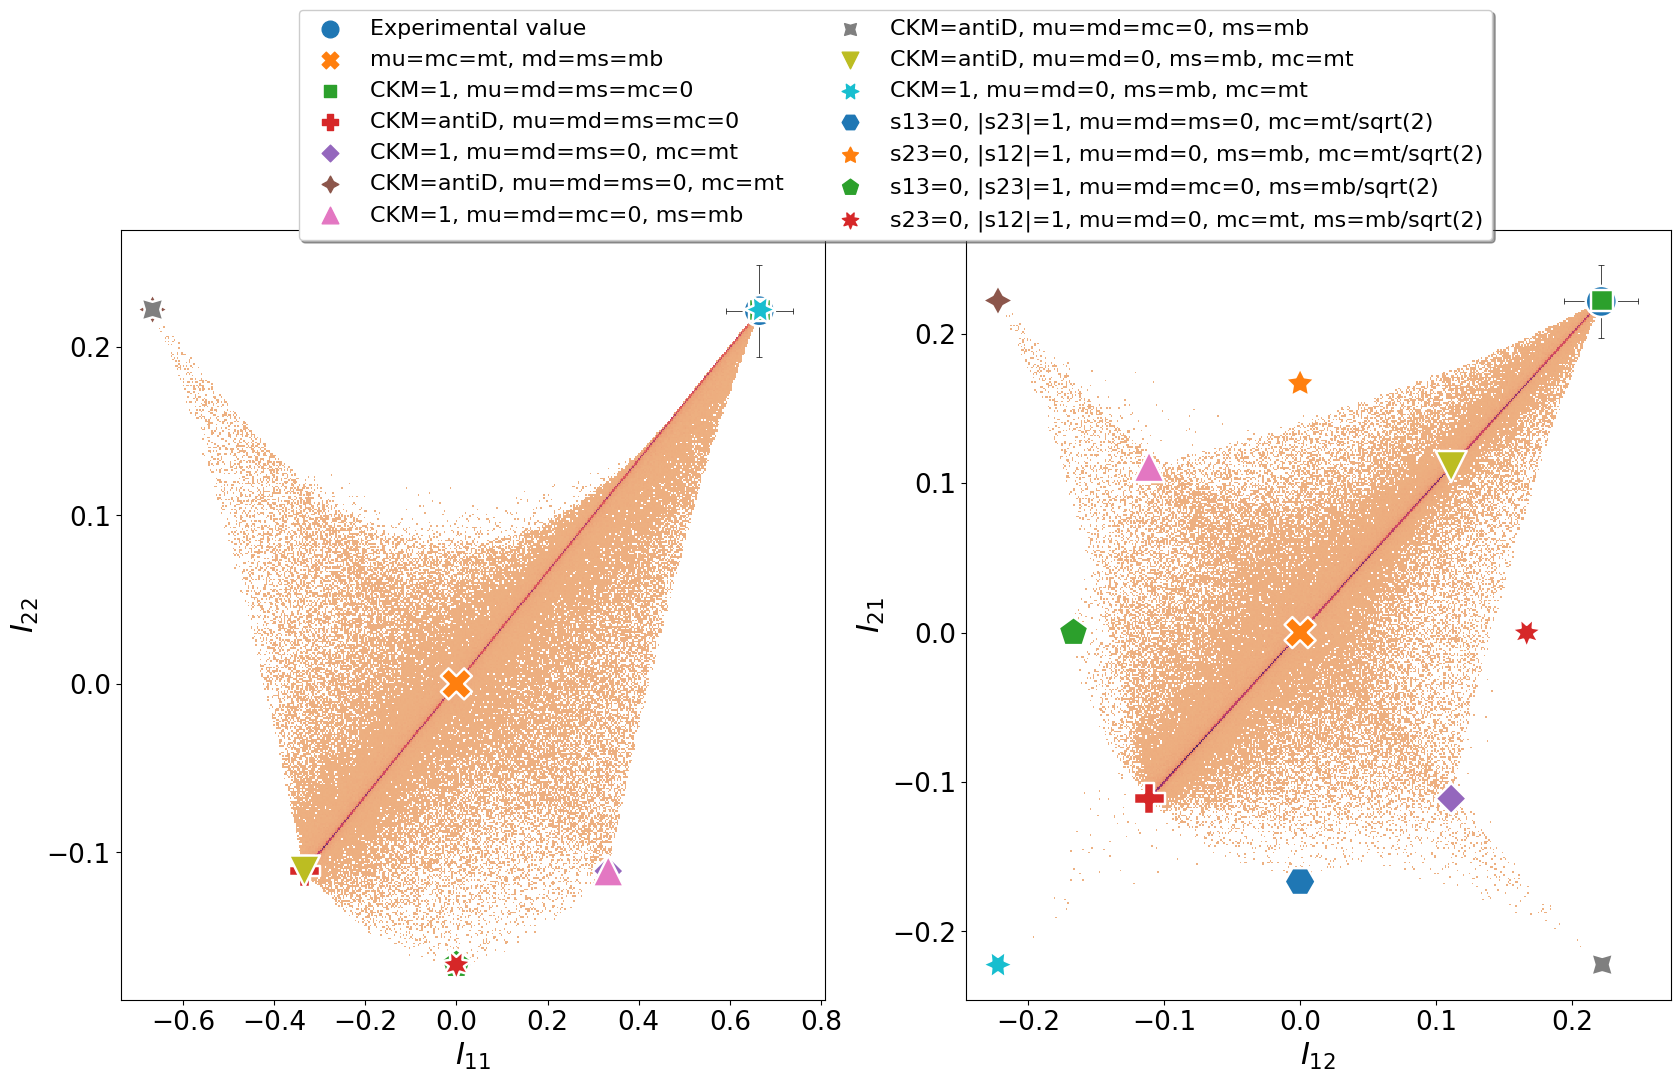

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.histplot(ax=axes[0], data=df_invariants, x='I11', y='I22', color='r', bins=400, cmap='flare')

axes[0].errorbar(df_exp_inv.mean().to_frame().T['I11'],
             df_exp_inv.mean().to_frame().T['I22'],
             xerr = (df_exp_inv.std().to_frame().T*1000)['I11'],
             yerr = (df_exp_inv.std().to_frame().T*1000)['I22'],
            ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=2)

sns.scatterplot(ax=axes[0], data=df_spe_inv, x='I11', y='I22', color='g',
                hue=df_spe_inv.index, palette='tab10',
                s=500,
                style=df_spe_inv.index,
                zorder=10)

axes[0].get_legend().remove()

axes[0].set_xlabel(r'$I_{11}$', fontsize=22)
axes[0].set_ylabel(r'$I_{22}$', fontsize=22)
axes[0].tick_params(axis='both', which='major', labelsize=19)
axes[0].tick_params(axis='both', which='minor', labelsize=19)

sns.histplot(ax=axes[1], data=df_invariants, x='I12', y='I21', color='r', bins=400, cmap='flare')

axes[1].errorbar(df_exp_inv.mean().to_frame().T['I12'],
             df_exp_inv.mean().to_frame().T['I21'],
             xerr = (df_exp_inv.std().to_frame().T*1000)['I12'],
             yerr = (df_exp_inv.std().to_frame().T*1000)['I21'],
            ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=2)

sns.scatterplot(ax=axes[1], data=df_spe_inv, x='I12', y='I21', color='g',
                hue=df_spe_inv.index, palette='tab10',
                s=500,
                style=df_spe_inv.index,
                zorder=10)

axes[1].legend(loc='upper center', bbox_to_anchor=(-0.1, 1.30),
          ncol=2, fancybox=True, shadow=True, fontsize=16, markerscale=2)

axes[1].set_xlabel(r'$I_{12}$', fontsize=22)
axes[1].set_ylabel(r'$I_{21}$', fontsize=22)
axes[1].tick_params(axis='both', which='major', labelsize=19)
axes[1].tick_params(axis='both', which='minor', labelsize=19)


#plt.savefig('new_I12_I22_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

In [33]:
my_markers=['X', (4, 0, 45), 'P', (4, 0, 0), (4,1,0), '^',
            (4, 1, 45), 'v', (6, 1, 0), (6, 0, 0), (5, 1, 0), 'p', (7, 1, 0)]

In [34]:
my_palette = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
              '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

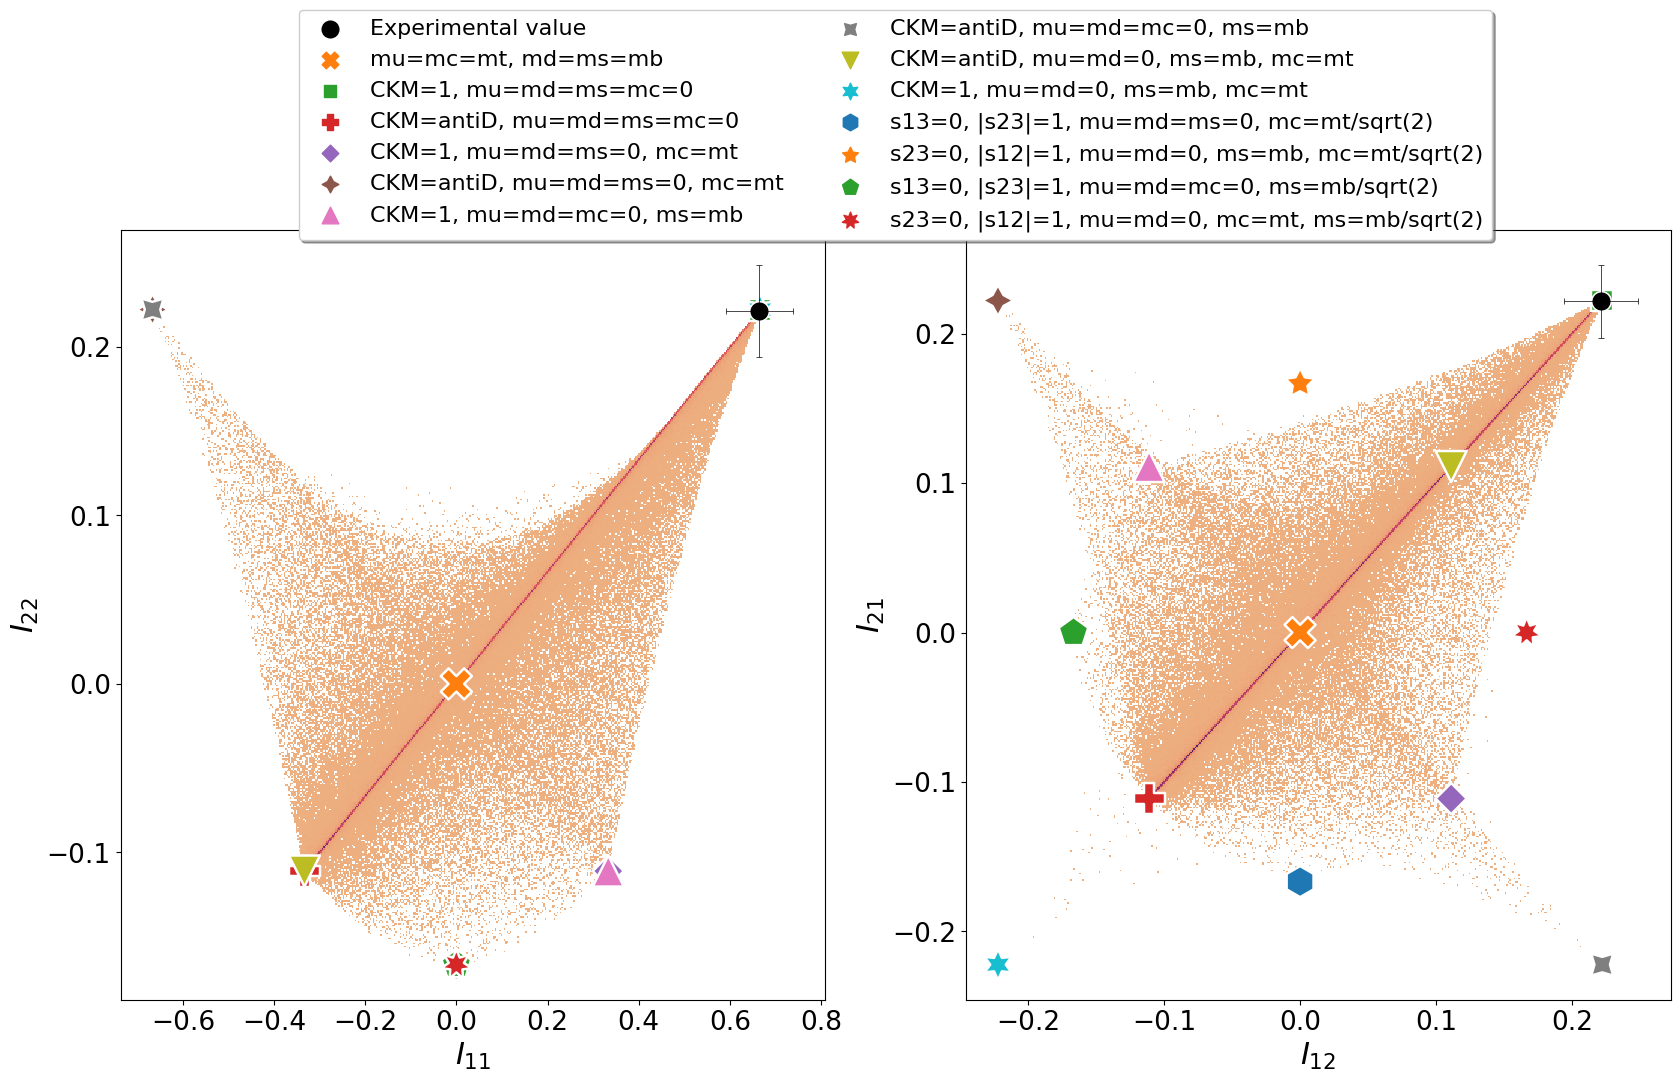

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.histplot(ax=axes[0], data=df_invariants, x='I11', y='I22', color='r', bins=400, cmap='flare')


sns.scatterplot(ax=axes[0], data=df_exp_inv.mean().to_frame().T, x='I11', y='I22', color='black',
                palette=['black'],
                hue=['Experimental value'],
                markers=['x'],
                s=200,
                zorder=11)


axes[0].errorbar(df_exp_inv.mean().to_frame().T['I11'],
             df_exp_inv.mean().to_frame().T['I22'],
             xerr = (df_exp_inv.std().to_frame().T*1000)['I11'],
             yerr = (df_exp_inv.std().to_frame().T*1000)['I22'],
            ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=11)

sns.scatterplot(ax=axes[0], data=df_spe_inv.iloc[1:,:], x='I11', y='I22', color='g',
                hue=df_spe_inv.iloc[1:,:].index, palette=my_palette,
                s=500,
                style=df_spe_inv.iloc[1:,:].index,
                markers=my_markers,
                zorder=10)

axes[0].get_legend().remove()

axes[0].set_xlabel(r'$I_{11}$', fontsize=22)
axes[0].set_ylabel(r'$I_{22}$', fontsize=22)
axes[0].tick_params(axis='both', which='major', labelsize=19)
axes[0].tick_params(axis='both', which='minor', labelsize=19)


sns.histplot(ax=axes[1], data=df_invariants, x='I12', y='I21', color='r', bins=400, cmap='flare')

sns.scatterplot(ax=axes[1], data=df_exp_inv.mean().to_frame().T, x='I12', y='I21', color='black',
                palette=['black'],
                hue=['Experimental value'],
                s=200,
                zorder=11)


axes[1].errorbar(df_exp_inv.mean().to_frame().T['I12'],
             df_exp_inv.mean().to_frame().T['I21'],
             xerr = (df_exp_inv.std().to_frame().T*1000)['I12'],
             yerr = (df_exp_inv.std().to_frame().T*1000)['I21'],
            ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=11)

sns.scatterplot(ax=axes[1], data=df_spe_inv.iloc[1:,:], x='I12', y='I21', color='g',
                hue=df_spe_inv.iloc[1:,:].index, palette=my_palette,
                s=500,
                style=df_spe_inv.iloc[1:,:].index,
                markers=my_markers,
                zorder=10)

axes[1].legend(loc='upper center', bbox_to_anchor=(-0.1, 1.30),
          ncol=2, fancybox=True, shadow=True, fontsize=16, markerscale=2)

axes[1].set_xlabel(r'$I_{12}$', fontsize=22)
axes[1].set_ylabel(r'$I_{21}$', fontsize=22)
axes[1].tick_params(axis='both', which='major', labelsize=19)
axes[1].tick_params(axis='both', which='minor', labelsize=19)


#plt.savefig('new_I12_I22_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

### Jointplots

#### Paper

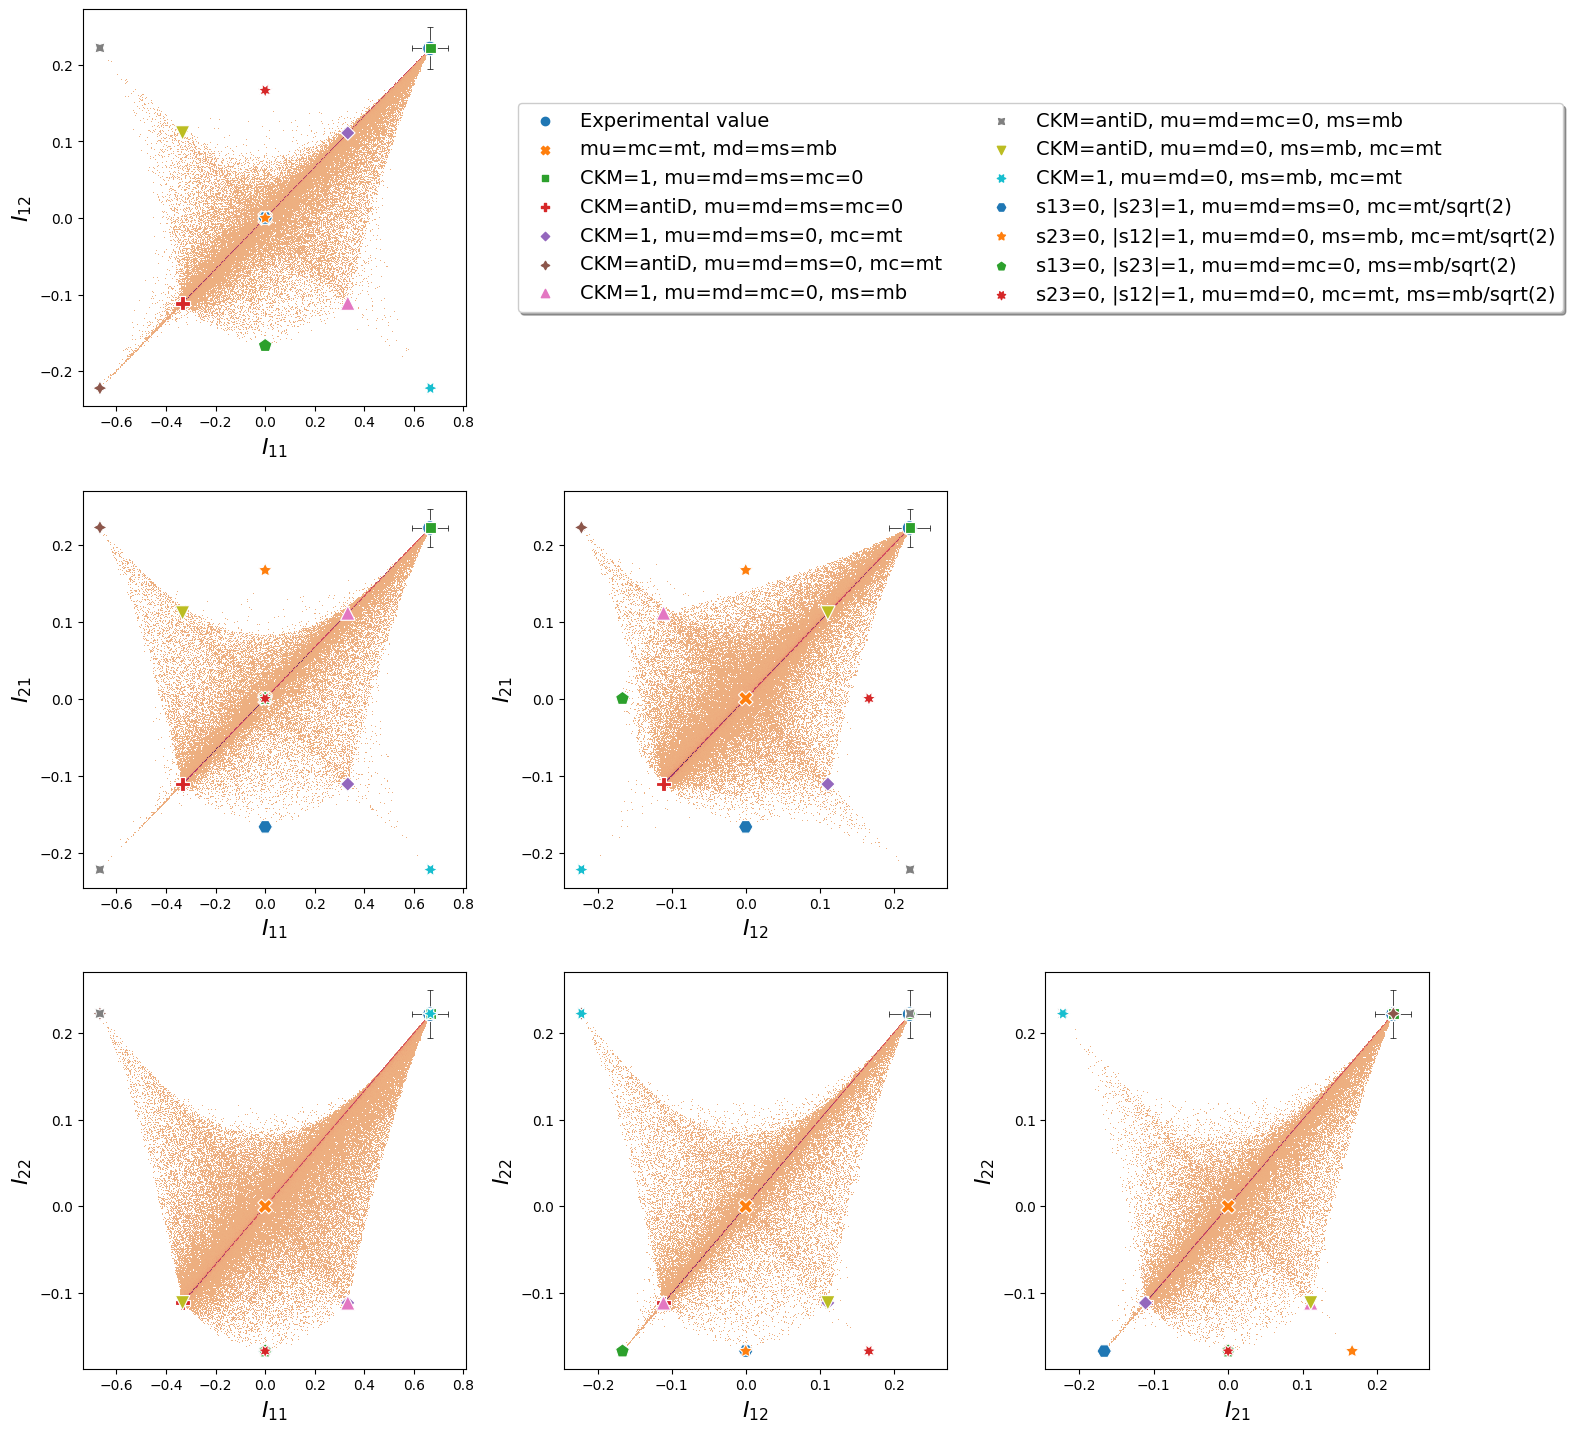

In [36]:
df_invariants_columns = df_invariants[['I11', 'I12', 'I21', 'I22']].columns

df_invariants_labels = ['I_{11}', 'I_{12}', 'I_{21}', 'I_{22}']

triangle_size = len(df_invariants_columns) - 1

legend_bool = [True if x == 0 else False for x in range(triangle_size)]

fig, axes = plt.subplots(figsize=(15, 15), sharex=False, sharey=False, ncols=triangle_size, nrows=triangle_size)

fig.tight_layout(pad=4.0)

for i in range(triangle_size):
    for j in range(triangle_size):
        if i<j:
            axes[i, j].axis('off')
        else:       
            sns.histplot(ax=axes[i,j], data=df_invariants, x=df_invariants_columns[j], y=df_invariants_columns[i+1],
                         color='r', bins=400, cmap='flare', zorder=1)
            
            sns.scatterplot(ax=axes[i,j], data=df_spe_inv,
                            x=df_invariants_columns[j],
                            y=df_invariants_columns[i+1],
                            hue=df_spe_inv.index, 
                            palette='tab10',
                            s=110,
                            style=df_spe_inv.index,
                            legend=legend_bool[i],
                            zorder=10)
            if legend_bool[i]:
                axes[0,0].legend(loc='center',
                                 bbox_to_anchor=(2.5, 0.5),
                                 ncol=2,
                                 fontsize=14,
                                 fancybox=True,
                                 shadow=True)
            
            axes[i,j].errorbar(df_exp_inv.mean().to_frame().T[df_invariants_columns[j]],
                         df_exp_inv.mean().to_frame().T[df_invariants_columns[i+1]],
                         xerr = (df_exp_inv.std().to_frame().T*1000)[df_invariants_columns[j]],
                         yerr = (df_exp_inv.std().to_frame().T*1000)[df_invariants_columns[i+1]],
                         ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=3)
            
            axes[i,j].set_xlabel(r'${0}$'.format(df_invariants_labels[j]), fontsize=16)
            axes[i,j].set_ylabel(r'${0}$'.format(df_invariants_labels[i+1]), fontsize=16)
            
#plt.savefig('jointplot_woJ33_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

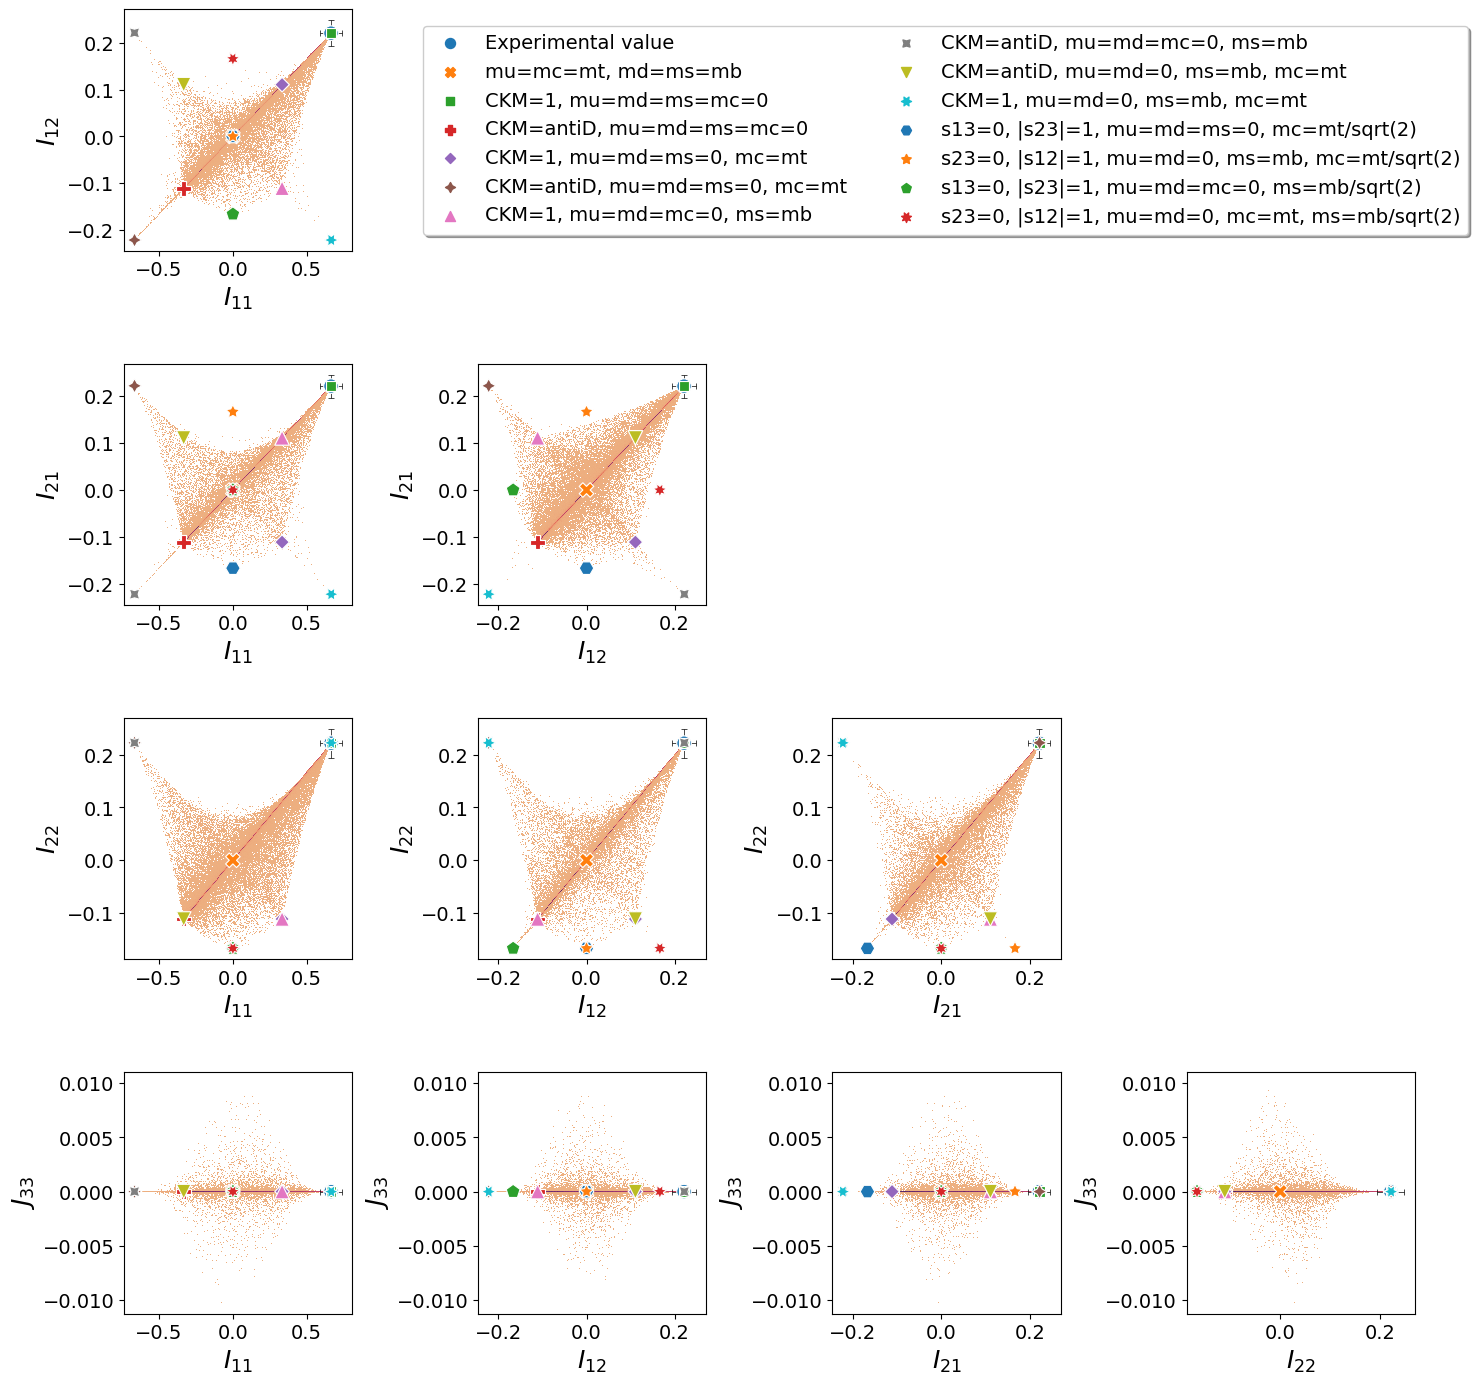

In [37]:
df_invariants_columns = df_invariants[['I11', 'I12', 'I21', 'I22', 'J33']].columns

df_invariants_labels = ['I_{11}', 'I_{12}', 'I_{21}', 'I_{22}', 'J_{33}']

triangle_size = len(df_invariants_columns) - 1

legend_bool = [True if x == 0 else False for x in range(triangle_size)]

fig, axes = plt.subplots(figsize=(15, 15), sharex=False, sharey=False, ncols=triangle_size, nrows=triangle_size)

fig.tight_layout(pad=6.0)

for i in range(triangle_size):
    for j in range(triangle_size):
        if i<j:
            axes[i, j].axis('off')
        else:       
            sns.histplot(ax=axes[i,j], data=df_invariants, x=df_invariants_columns[j], y=df_invariants_columns[i+1],
                         color='r', bins=400, cmap='flare', zorder=1)
            
            sns.scatterplot(ax=axes[i,j], data=df_spe_inv,
                            x=df_invariants_columns[j],
                            y=df_invariants_columns[i+1],
                            hue=df_spe_inv.index, 
                            palette='tab10',
                            s=110,
                            style=df_spe_inv.index,
                            legend=legend_bool[i],
                            zorder=10)
            if legend_bool[i]:
                axes[0,0].legend(loc='center', 
                                 bbox_to_anchor=(3.6, 0.5),
                                 fontsize=14, 
                                 ncol=2, 
                                 fancybox=True, 
                                 shadow=True,
                                 markerscale=1.2)
            
            axes[i,j].errorbar(df_exp_inv.mean().to_frame().T[df_invariants_columns[j]],
                         df_exp_inv.mean().to_frame().T[df_invariants_columns[i+1]],
                         xerr = (df_exp_inv.std().to_frame().T*1000)[df_invariants_columns[j]],
                         yerr = (df_exp_inv.std().to_frame().T*1000)[df_invariants_columns[i+1]],
                         ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=3)
            
            axes[i,j].set_xlabel(r'${0}$'.format(df_invariants_labels[j]), fontsize=18)
            axes[i,j].set_ylabel(r'${0}$'.format(df_invariants_labels[i+1]), fontsize=18)
            axes[i,j].tick_params(axis='both', which='major', labelsize=14)
            axes[i,j].tick_params(axis='both', which='minor', labelsize=14)
            
#plt.savefig('jointplot_wJ33_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

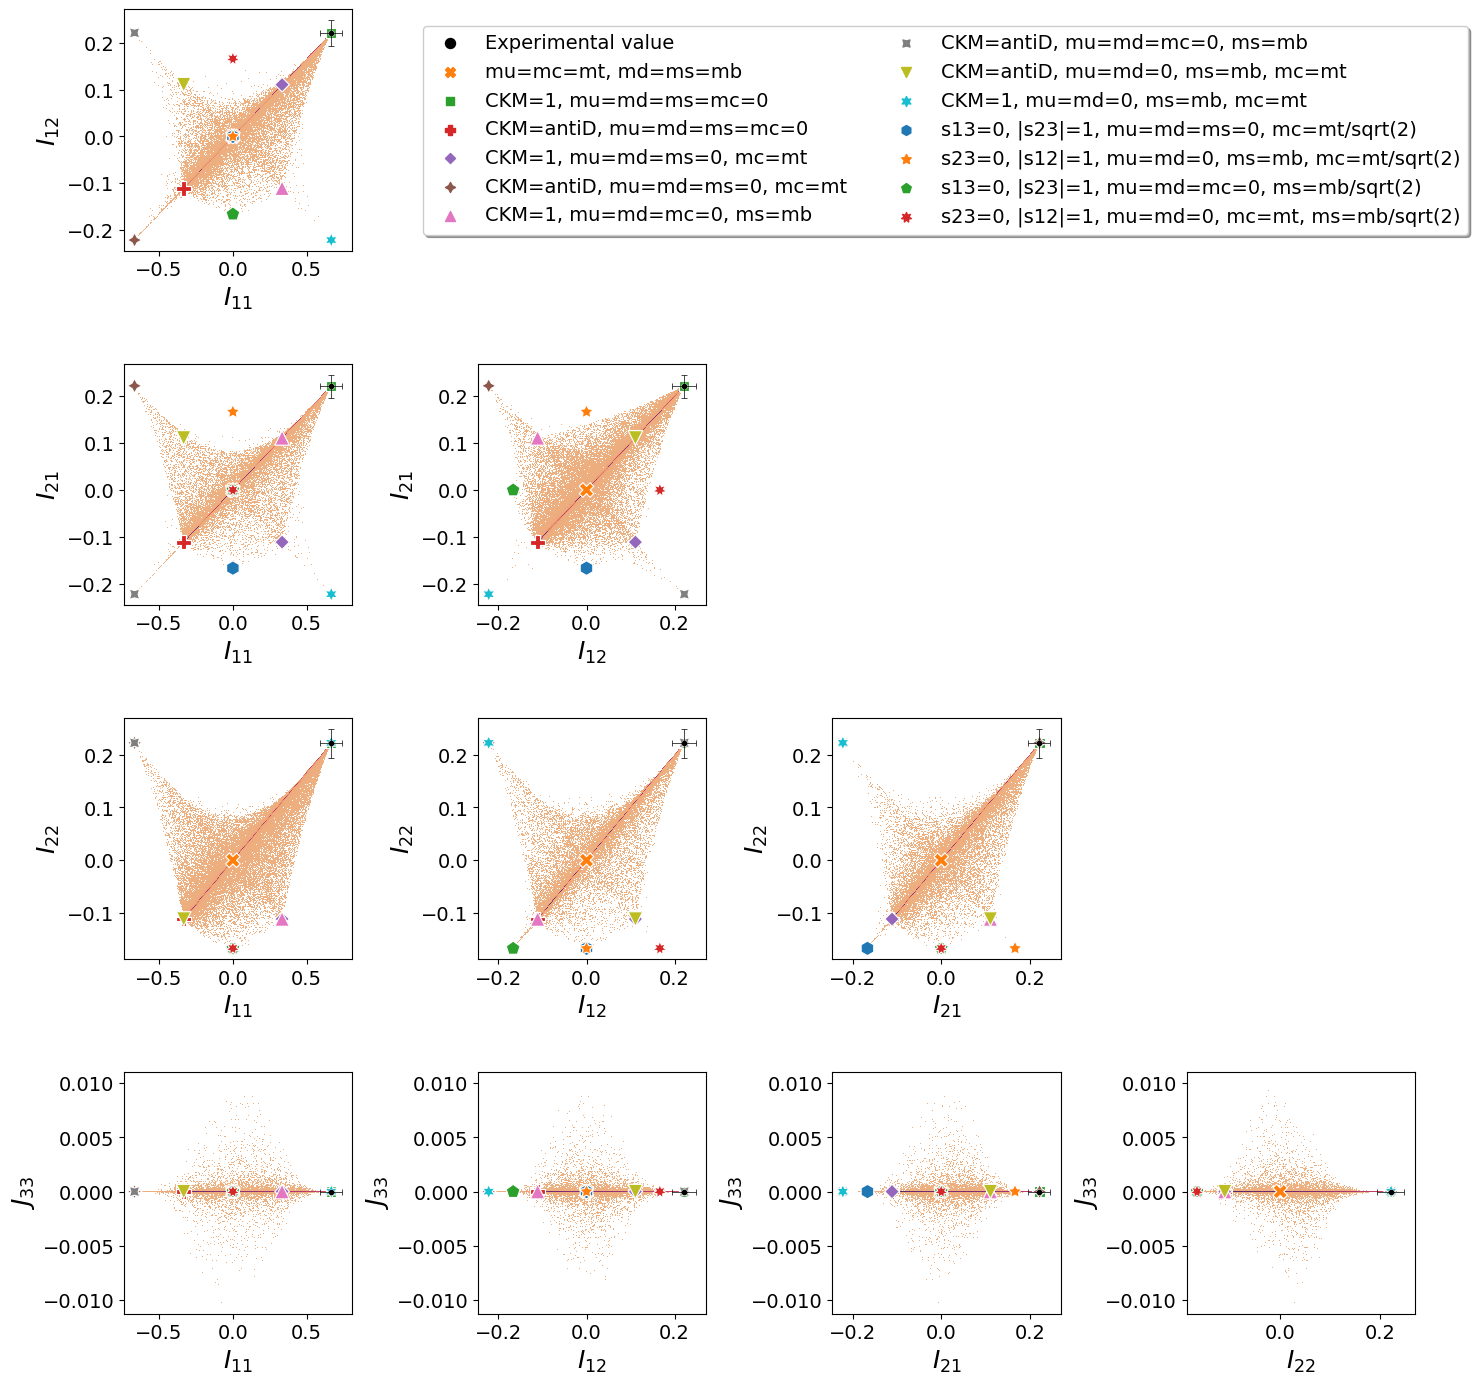

In [38]:
df_invariants_columns = df_invariants[['I11', 'I12', 'I21', 'I22', 'J33']].columns

df_invariants_labels = ['I_{11}', 'I_{12}', 'I_{21}', 'I_{22}', 'J_{33}']

triangle_size = len(df_invariants_columns) - 1

legend_bool = [True if x == 0 else False for x in range(triangle_size)]

fig, axes = plt.subplots(figsize=(15, 15), sharex=False, sharey=False, ncols=triangle_size, nrows=triangle_size)

fig.tight_layout(pad=6.0)

for i in range(triangle_size):
    for j in range(triangle_size):
        if i<j:
            axes[i, j].axis('off')
        else:       
            sns.histplot(ax=axes[i,j], data=df_invariants, x=df_invariants_columns[j], y=df_invariants_columns[i+1],
                         color='r', bins=400, cmap='flare', zorder=1)

            sns.scatterplot(ax=axes[i,j], data=df_exp_inv.mean().to_frame().T, x=df_invariants_columns[j],
                            y=df_invariants_columns[i+1], color='black',
                            hue=['Experimental value'], palette=['black'], s=20, zorder=11,
                           legend=legend_bool[i])
            
            sns.scatterplot(ax=axes[i,j], data=df_spe_inv.iloc[1:, :],
                            x=df_invariants_columns[j],
                            y=df_invariants_columns[i+1],
                            hue=df_spe_inv.iloc[1:, :].index, 
                            palette=my_palette,
                            s=110,
                            style=df_spe_inv.iloc[1:, :].index,
                            markers=my_markers,
                            legend=legend_bool[i],
                            zorder=10)
            if legend_bool[i]:
                axes[0,0].legend(loc='center', 
                                 bbox_to_anchor=(3.6, 0.5),
                                 fontsize=14, 
                                 ncol=2, 
                                 fancybox=True, 
                                 shadow=True,
                                 markerscale=1.2)
            
            axes[i,j].errorbar(df_exp_inv.mean().to_frame().T[df_invariants_columns[j]],
                         df_exp_inv.mean().to_frame().T[df_invariants_columns[i+1]],
                         xerr = (df_exp_inv.std().to_frame().T*1000)[df_invariants_columns[j]],
                         yerr = (df_exp_inv.std().to_frame().T*1000)[df_invariants_columns[i+1]],
                         ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=11)
            
            axes[i,j].set_xlabel(r'${0}$'.format(df_invariants_labels[j]), fontsize=18)
            axes[i,j].set_ylabel(r'${0}$'.format(df_invariants_labels[i+1]), fontsize=18)
            axes[i,j].tick_params(axis='both', which='major', labelsize=14)
            axes[i,j].tick_params(axis='both', which='minor', labelsize=14)
            
#plt.savefig('jointplot_wJ33_alt_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

## Other plots

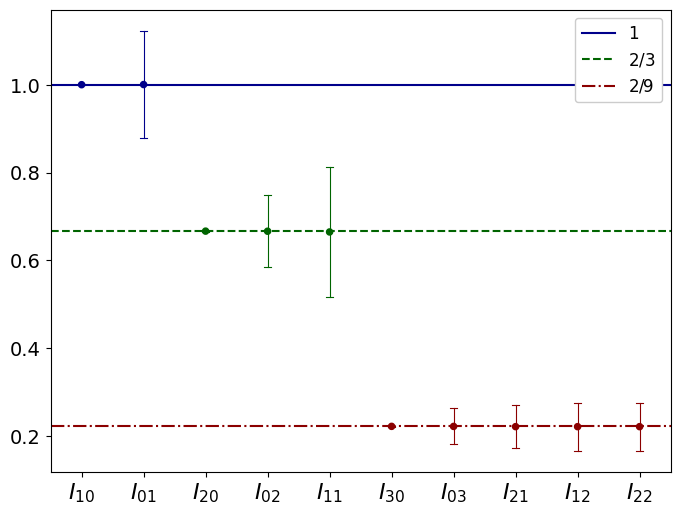

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(data=df_exp_inv[['I10', 'I01', 'I20', 'I02', 'I11', 'I30', 'I03', 'I21', 'I12', 'I22']],
              errorbar=("sd", 2000),
              capsize=0.1,
              errwidth=0.8,
              color='darkblue',
              palette=['darkblue', 'darkblue', 'darkgreen', 'darkgreen', 'darkgreen', 
                       'darkred', 'darkred', 'darkred', 'darkred', 'darkred'],
              markers='.',
              join=False)

plt.axhline(y = 1.0, color = 'darkblue', linestyle='-', label = r'$1$')
plt.axhline(y = 2/3, color = 'darkgreen', linestyle='--', label = r'$2/3$')
plt.axhline(y = 2/9, color = 'darkred', linestyle='-.', label = r'$2/9$')

plt.legend(loc='best', framealpha=1, fontsize=12)
              
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.set_xticklabels([r'$I_{10}$', r'$I_{01}$', r'$I_{20}$', r'$I_{02}$',
                    r'$I_{11}$', r'$I_{30}$', r'$I_{03}$', r'$I_{21}$', 
                    r'$I_{12}$', r'$I_{22}$'])

#plt.savefig('errorfig', dpi=500, bbox_inches='tight')

plt.show()

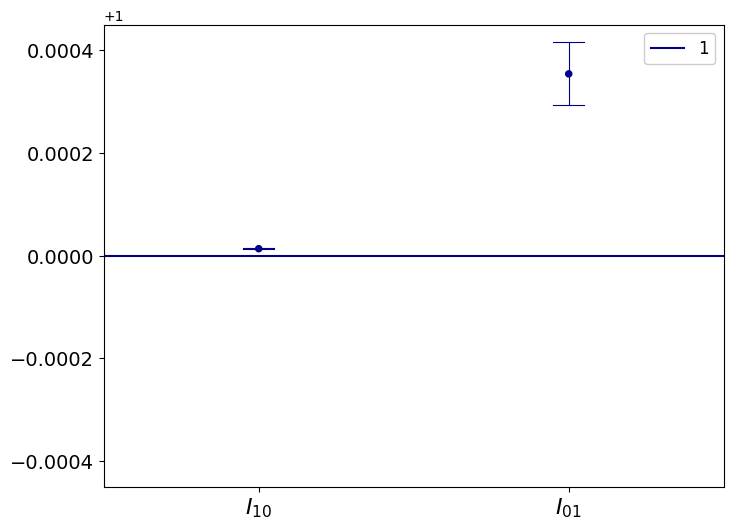

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(data=df_exp_inv[['I10', 'I01']],
              errorbar=("sd"),
              capsize=0.1,
              errwidth=0.8,
              color='darkblue',
              palette=['darkblue', 'darkblue'],
              markers='.',
              join=False)

plt.axhline(y = 1.0, color = 'darkblue', linestyle='-', label = r'$1$')

plt.legend(loc='best', framealpha=1, fontsize=12)

plt.ylim(1-0.00045, 1+0.00045)

plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.set_xticklabels([r'$I_{10}$', r'$I_{01}$'])

#plt.savefig('errorfig1', dpi=500, bbox_inches='tight')

plt.show()

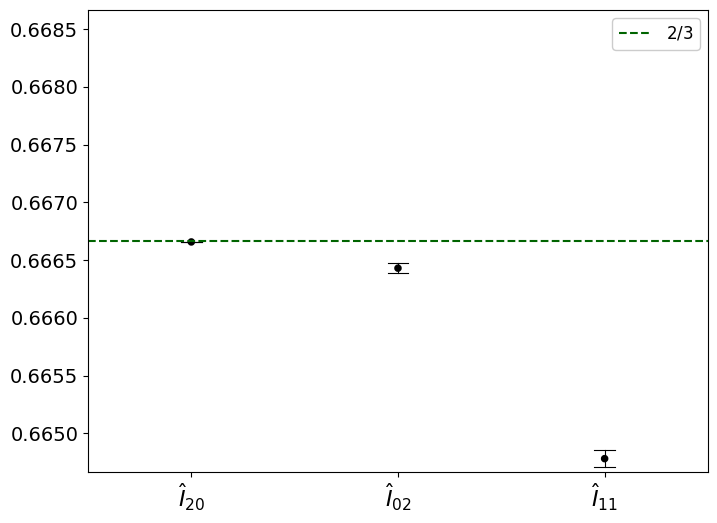

In [41]:
fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(data=df_exp_inv[['I20', 'I02', 'I11']],
              errorbar=("sd"),
              capsize=0.1,
              errwidth=0.8,
              color='black',
              palette=['black', 'black', 'black'],
              markers='.',
              join=False)

plt.axhline(y = 2/3, color = 'darkgreen', linestyle='--', label = r'$2/3$')

plt.legend(loc='best', framealpha=1, fontsize=12)

plt.ylim(2/3-0.002, 2/3+0.002)
              
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.set_xticklabels([r'$\hat{I}_{20}$', r'$\hat{I}_{02}$', r'$\hat{I}_{11}$'])

#plt.savefig('errorfig2', dpi=500, bbox_inches='tight')

plt.show()

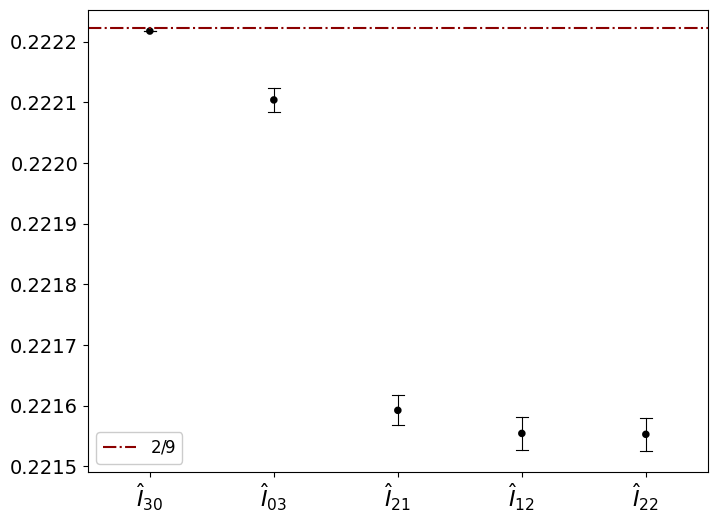

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(data=df_exp_inv[['I30', 'I03', 'I21', 'I12', 'I22']],
              errorbar=("sd"),
              capsize=0.1,
              errwidth=0.8,
              color='black',
              palette=['black', 'black', 'black', 'black', 'black'],
              markers='.',
              join=False)

plt.axhline(y = 2/9, color = 'darkred', linestyle='-.', label = r'$2/9$')

plt.legend(loc='best', framealpha=1, fontsize=12)
              
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.set_xticklabels([r'$\hat{I}_{30}$', r'$\hat{I}_{03}$', r'$\hat{I}_{21}$', r'$\hat{I}_{12}$', r'$\hat{I}_{22}$'])

#plt.savefig('errorfig3', dpi=500, bbox_inches='tight')

plt.show()

In [43]:
if False:   
    
    sns.jointplot(data=df_invariants, x='I11', y='s23', kind="hist", cmap='flare',
                      marginal_kws=dict(color='darkred'), zorder=1)
    sns.scatterplot(data=df_exp_inv.mean().to_frame().T, x='I11', y='s23', color='black',
                    hue=['Experimental value'], palette=['black'], s=20, zorder=3)

    plt.errorbar(df_exp_inv.mean().to_frame().T['I11'],
                 df_exp_inv.mean().to_frame().T['s23'],
                 xerr = (df_exp_inv.std().to_frame().T*1000)['I11'],
                 yerr = (df_exp_inv.std().to_frame().T*100)['s23'],
                ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=2)

    plt.xlabel(r'$I_{11}$', fontsize=14)
    plt.ylabel(r'$s_{23}$', fontsize=14)

    plt.legend(markerscale=.5)

    #plt.savefig('new_I11_s23_experimental_{0}'.format(distribution_masses), dpi=400, bbox_inches='tight')

    plt.show()

In [44]:
if False:

    sns.jointplot(data=df_invariants, x='I11', y='s12', kind="hist", cmap='flare',
                      marginal_kws=dict(color='darkred'))

    sns.scatterplot(data=df_exp_inv.mean().to_frame().T, x='I11', y='s12', color='black',
                    hue=['Experimental value'], palette=['black'], s=20)

    plt.errorbar(df_exp_inv.mean().to_frame().T['I11'],
                 df_exp_inv.mean().to_frame().T['s12'],
                 xerr = (df_exp_inv.std().to_frame().T*1000)['I11'],
                 yerr = (df_exp_inv.std().to_frame().T*100)['s12'],
                ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=2)

    plt.xlabel(r'$I_{11}$', fontsize=14)
    plt.ylabel(r'$s_{12}$', fontsize=14)

    plt.legend(markerscale=.5)

    #plt.savefig('new_I11_s12_experimental_{0}'.format(distribution_masses), dpi=400, bbox_inches='tight')

    plt.show()

In [45]:
if False:

    sns.jointplot(data=df_invariants, x='I11', y='s13', kind="hist", cmap='flare',
                      marginal_kws=dict(color='darkred'))

    sns.scatterplot(data=df_exp_inv.mean().to_frame().T, x='I11', y='s13', color='black',
                    hue=['Experimental value'], palette=['black'], s=20)

    plt.errorbar(df_exp_inv.mean().to_frame().T['I11'],
                 df_exp_inv.mean().to_frame().T['s13'],
                 xerr = (df_exp_inv.std().to_frame().T*1000)['I11'],
                 yerr = (df_exp_inv.std().to_frame().T*1000)['s13'],
                ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=2)

    plt.xlabel(r'$I_{11}$', fontsize=14)
    plt.ylabel(r'$s_{13}$', fontsize=14)

    plt.legend(markerscale=.5)

    #plt.savefig('new_I11_s13_experimental_{0}'.format(distribution_masses), dpi=400, bbox_inches='tight')

    plt.show()

In [46]:
if False:

    sns.jointplot(data=df_invariants, x='I11', y='delta', kind="hist", cmap='flare',
                      marginal_kws=dict(color='darkred'))

    sns.scatterplot(data=df_exp_inv.mean().to_frame().T, x='I11', y='delta', color='black',
                    hue=['Experimental value'], palette=['black'], s=20)

    plt.errorbar(df_exp_inv.mean().to_frame().T['I11'],
                 df_exp_inv.mean().to_frame().T['delta'],
                 xerr = (df_exp_inv.std().to_frame().T*1000)['I11'],
                 yerr = (df_exp_inv.std().to_frame().T*10)['delta'],
                ecolor = 'black', elinewidth = .5, capthick = 0.5, capsize=2, zorder=2)

    plt.xlabel(r'$I_{11}$', fontsize=14)
    plt.ylabel(r'$\delta$', fontsize=14)

    plt.legend(markerscale=.5)

    #plt.savefig('I11_delta_experimental_{0}'.format(distribution_masses), dpi=400, bbox_inches='tight')

    plt.show()

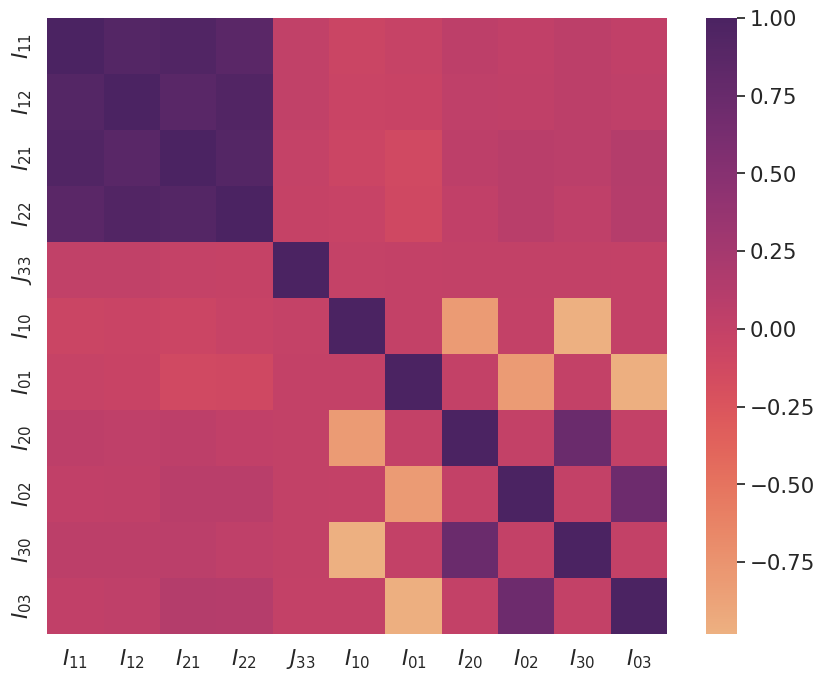

In [47]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

x_axis_labels = [r'$I_{11}$', r'$I_{12}$', r'$I_{21}$', r'$I_{22}$', r'$J_{33}$', 
                 r'$I_{10}$', r'$I_{01}$', r'$I_{20}$', r'$I_{02}$', r'$I_{30}$', 
                 r'$I_{03}$']
y_axis_labels = x_axis_labels

sns.heatmap(df_invariants[['I11', 'I21', 'I12', 'I22', 'J33', 
                           'I10', 'I01', 'I20', 'I02', 'I30', 'I03']].corr(),
            cmap='flare', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

#plt.savefig('correlations_{0}'.format(distribution_masses), dpi=400, bbox_inches='tight')

plt.show()

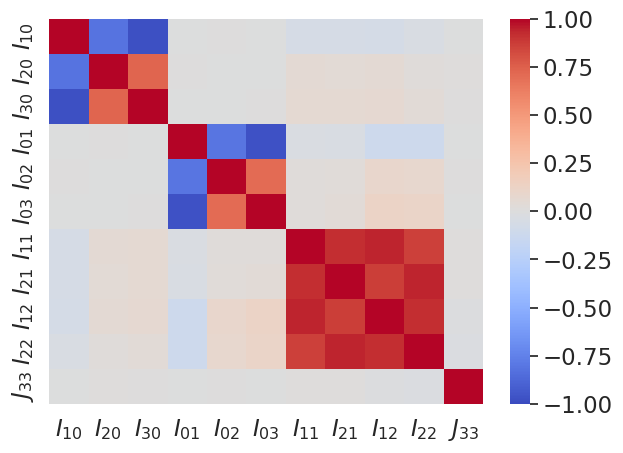

In [48]:
plt.figure(figsize=(7, 5))

sns.set(font_scale=1.5)

x_axis_labels = [r'$I_{10}$', r'$I_{20}$', r'$I_{30}$', r'$I_{01}$',
                    r'$I_{02}$', r'$I_{03}$', r'$I_{11}$', r'$I_{21}$', 
                    r'$I_{12}$', r'$I_{22}$', r'$J_{33}$']

y_axis_labels = x_axis_labels

sns.heatmap(df_invariants[['I10', 'I20', 'I30', 'I01', 'I02', 'I03', 'I11', 'I21', 'I12', 'I22', 'J33']].corr(),
            cmap='coolwarm', xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
            vmin=-1, vmax=1)



#plt.savefig('correlations_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

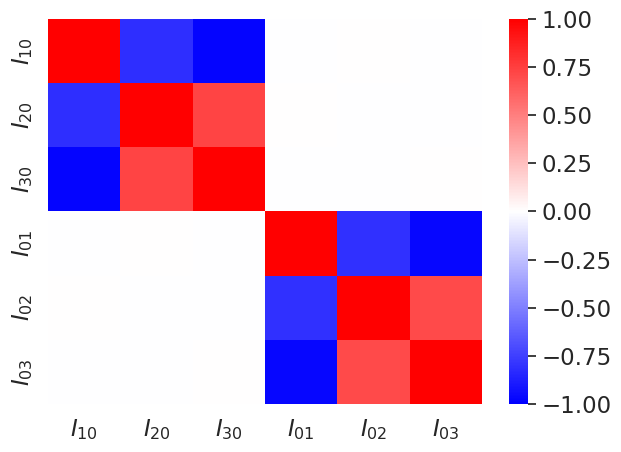

In [49]:
plt.figure(figsize=(7, 5))

sns.set(font_scale=1.5)

x_axis_labels = [r'$I_{10}$', r'$I_{20}$', r'$I_{30}$', r'$I_{01}$',
                    r'$I_{02}$', r'$I_{03}$']

y_axis_labels = x_axis_labels

# CMAP!!

sns.heatmap(df_invariants[['I10', 'I20', 'I30', 'I01', 'I02', 'I03']].corr(),
            cmap='bwr', xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
            vmin=-1, vmax=1)



#plt.savefig('correlations_masses_{0}'.format(distribution_masses), dpi=500, bbox_inches='tight')

plt.show()

## RGE plots

In [50]:
df_rge_scale = pd.read_table("./JPS/index_rge.dat", sep="\s+", names=['Scale'])

df_rge = pd.read_table("./JPS/inv_rges.dat", sep="\s+", names=[r'$I_{10}$', r'$I_{20}$', r'$I_{30}$',
                                                               r'$I_{01}$', r'$I_{02}$', r'$I_{03}$', 
                                                               r'$I_{11}$', r'$I_{12}$', r'$I_{21}$', 
                                                               r'$I_{22}$'])

df_rge_mass = pd.read_table("./JPS/max_mass.dat", sep="\s+", names=['mt^2', 'mb^2'])

df_rge.reset_index(drop=True, inplace=True)
df_rge_mass.reset_index(drop=True, inplace=True)

df_rge = df_rge.sort_values(by=df_rge.index[0], ascending=False, axis=1)

df_rge = pd.concat((df_rge, df_rge_mass), axis=1)

df_rge_scale = df_rge_scale / 1000
df_rge.index = df_rge_scale.to_numpy().reshape(-1,)

In [51]:
df_rge.describe()

,$I_{10}$,$I_{20}$,$I_{30}$,$I_{01}$,$I_{11}$,$I_{21}$,$I_{02}$,$I_{12}$,$I_{22}$,$I_{03}$,mt^2,mb^2
count,17127.000000,17127.000000,17127.000000,17127.000000,17127.000000,1.712700e+04,1.712700e+04,1.712700e+04,1.712700e+04,1.712700e+04,17127.000000,17127.000000
mean,0.362132,0.110610,0.020636,0.000082,0.000026,5.162436e-06,6.434988e-09,1.309143e-09,8.952864e-10,3.361253e-13,0.362127,0.000082
std,0.186504,0.119852,0.033711,0.000055,0.000033,9.232997e-06,9.106025e-09,2.538239e-09,2.143585e-09,7.005436e-13,0.186501,0.000055
min,0.164261,0.017987,0.000985,0.000030,0.000003,1.766629e-07,5.828148e-10,3.180005e-11,5.223424e-12,5.744073e-15,0.164259,0.000030
25%,0.216037,0.031114,0.002241,0.000041,0.000006,4.203218e-07,1.102353e-09,7.911611e-11,1.709177e-11,1.494188e-14,0.216035,0.000041
50%,0.298584,0.059433,0.005915,0.000060,0.000012,1.193855e-06,2.436543e-09,2.417261e-10,7.217441e-11,4.910043e-14,0.298581,0.000060
75%,0.456756,0.139079,0.021175,0.000104,0.000032,4.812016e-06,7.225591e-09,1.096812e-09,5.009664e-10,2.507461e-13,0.456751,0.000104
max,0.935680,0.583641,0.182030,0.000266,0.000166,5.167606e-05,4.728651e-08,1.470904e-08,1.376268e-08,4.197880e-12,0.935668,0.000266


In [52]:
df_rge.drop(['mt^2', 'mb^2'], axis=1, inplace=True)

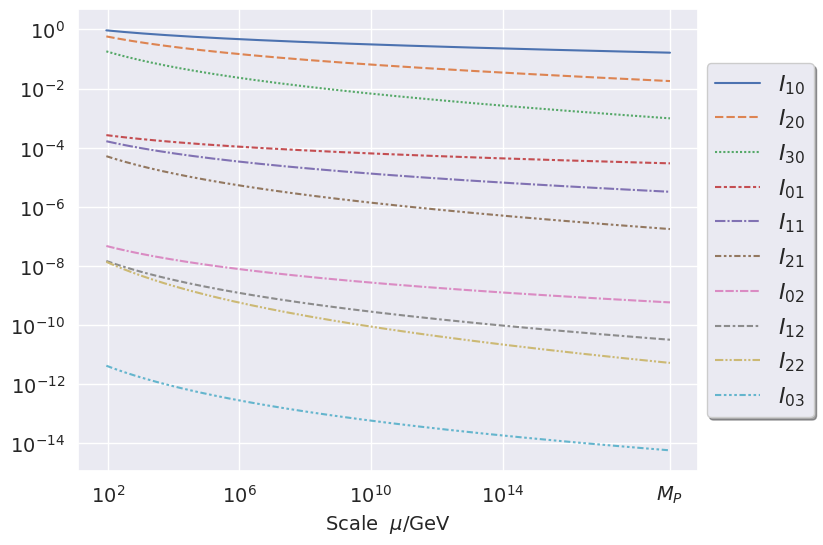

In [53]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=df_rge)

plt.xscale('log')
plt.yscale('log')
ax.set_xticks([10**2, 10**6, 10**10, 10**14, 1.22*10**19])
ax.set_xticklabels(['$10^2$', '$10^6$', '$10^{10}$', '$10^{14}$', '$M_P$'])
ax.set_yticks(np.logspace(-14, 0, 8))

ax.legend(loc='center', bbox_to_anchor=(1.1, .5), ncol=1, 
          fancybox=True, shadow=True, fontsize=16, markerscale=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel(r'Scale  $\mu / \mathrm{GeV}$', fontsize=14)

#plt.savefig('rge_inv', dpi=500, bbox_inches='tight')

plt.show()

## CKM RGE

In [54]:
df_ckm_rge = pd.DataFrame(data={r'$|V_{ub}| \times 10^{3}$': [0.00369,
                                                0.0037604355863905, 
                                                0.0038166870940308, 
                                                0.0038651304050071, 
                                                0.0039077432148327, 
                                                0.0039457982514647, 
                                                0.0039801689987234,
                                                0.0040114847524475,
                                                0.0040402159121728,
                                                0.0040667247673535,
                                                0.0040912973239235,
                                                0.0041141637573616,
                                                0.0041355125846254,
                                                0.0041555004406969,
                                                0.0041742589711334,
                                                0.0041919001330774,
                                                0.0042085199523219,
                                                0.00422551], 
                                r'$|V_{cb}| \times 10^{2}$': [0.041819715286380, 
                                                0.042617898182466, 
                                                0.043255342975307, 
                                                0.043804302914137, 
                                                0.044287190023484, 
                                                0.044718427337873,
                                                0.045107913493453,
                                                0.045462779890374,
                                                0.045788357253865,
                                                0.046088751164465,
                                                0.046367202729334,
                                                0.046626320364625,
                                                0.046868240397276,
                                                0.047094737856581,
                                                0.047307304583268,
                                                0.047507209302428,
                                                0.047695540200019,
                                                0.0478881], 
                                r'$|V_{td}| \times 10^{3}$': [0.0085707894494693, 
                                                0.0087345492394820, 
                                                0.0088653381098179, 
                                                0.0089779770336936, 
                                                0.0090770626813421, 
                                                0.0091655532560404,
                                                0.0092454790065331,
                                                0.0093183026628509,
                                                0.009385117616388,
                                                0.0094467659794385,
                                                0.009503912573864,
                                                0.009557092437945,
                                                0.009606743786398,
                                                0.009653230731071,
                                                0.0096968592908003,
                                                0.009737889726327,
                                                0.0097765452664446,
                                                0.00981607], 
                                r'$J \times 10^{5}$': [0.000030768669144309, 
                                                0.00003195393174, 
                                                0.00003291657372, 
                                                0.000033757023903, 
                                                0.000034505064658, 
                                                0.00003518001467,
                                                0.00003579522903,
                                                0.00003636039605,
                                                0.00003688280517,
                                                0.000037368106112,
                                                0.00003782078693,
                                                0.00003824448100,
                                                0.00003864218172,
                                                0.00003901639058,
                                                0.00003936922149,
                                                0.00003970248215,
                                                0.00004001773111,
                                                0.0000403414]}, 
                          index=[mz/1000, 10**3, 10**4, 10**5, 
                                 10**6, 10**7, 10**8, 10**9, 10**10, 10**11, 
                                 10**12, 10**13, 10**14, 10**15, 10**16, 10**17, 
                                 10**18, 1.22e19])

In [55]:
df_ckm_rge[r'$|V_{ub}| \times 10^{3}$'] = df_ckm_rge[r'$|V_{ub}| \times 10^{3}$'] * 1000
df_ckm_rge[r'$|V_{cb}| \times 10^{2}$'] = df_ckm_rge[r'$|V_{cb}| \times 10^{2}$'] * 100
df_ckm_rge[r'$|V_{td}| \times 10^{3}$'] = df_ckm_rge[r'$|V_{td}| \times 10^{3}$'] * 1000
df_ckm_rge[r'$J \times 10^{5}$'] = df_ckm_rge[r'$J \times 10^{5}$'] * 100000

In [56]:
df_ckm_rge[r'$[|V_{ub}| - |V_{ub}(\mu = M_Z)|] \times 10^{3}$'] = df_ckm_rge[r'$|V_{ub}| \times 10^{3}$'] - \
                                           df_ckm_rge[r'$|V_{ub}| \times 10^{3}$'].values[0]

df_ckm_rge[r'$[|V_{cb}| - |V_{cb}(\mu = M_Z)|] \times 10^{2}$'] = df_ckm_rge[r'$|V_{cb}| \times 10^{2}$'] - \
                                           df_ckm_rge[r'$|V_{cb}| \times 10^{2}$'].values[0]

df_ckm_rge[r'$[|V_{td}| - |V_{td}(\mu = M_Z)|] \times 10^{3}$'] = df_ckm_rge[r'$|V_{td}| \times 10^{3}$'] - \
                                           df_ckm_rge[r'$|V_{td}| \times 10^{3}$'].values[0]

df_ckm_rge[r'$[J - J(\mu = M_Z)] \times 10^{5}$'] = df_ckm_rge[r'$J \times 10^{5}$'] - \
                                           df_ckm_rge[r'$J \times 10^{5}$'].values[0]

In [57]:
df_ckm_rge

,$|V_{ub}| \times 10^{3}$,$|V_{cb}| \times 10^{2}$,$|V_{td}| \times 10^{3}$,$J \times 10^{5}$,$[|V_{ub}| - |V_{ub}(\mu = M_Z)|] \times 10^{3}$,$[|V_{cb}| - |V_{cb}(\mu = M_Z)|] \times 10^{2}$,$[|V_{td}| - |V_{td}(\mu = M_Z)|] \times 10^{3}$,$[J - J(\mu = M_Z)] \times 10^{5}$
9.118760e+01,3.690000,4.181972,8.570789,3.076867,0.000000,0.000000,0.000000,0.000000
1.000000e+03,3.760436,4.261790,8.734549,3.195393,0.070436,0.079818,0.163760,0.118526
1.000000e+04,3.816687,4.325534,8.865338,3.291657,0.126687,0.143563,0.294549,0.214790
1.000000e+05,3.865130,4.380430,8.977977,3.375702,0.175130,0.198459,0.407188,0.298835
1.000000e+06,3.907743,4.428719,9.077063,3.450506,0.217743,0.246747,0.506273,0.373640
1.000000e+07,3.945798,4.471843,9.165553,3.518001,0.255798,0.289871,0.594764,0.441135
1.000000e+08,3.980169,4.510791,9.245479,3.579523,0.290169,0.328820,0.674690,0.502656
1.000000e+09,4.011485,4.546278,9.318303,3.636040,0.321485,0.364306,0.747513,0.559173
1.000000e+10,4.040216,4.578836,9.385118,3.688281,0.350216,0.396864,0.814328,0.611414
1.000000e+11,4.066725,4.608875,9.446766,3.736811,0.376725,0.426904,0.875977,0.659944


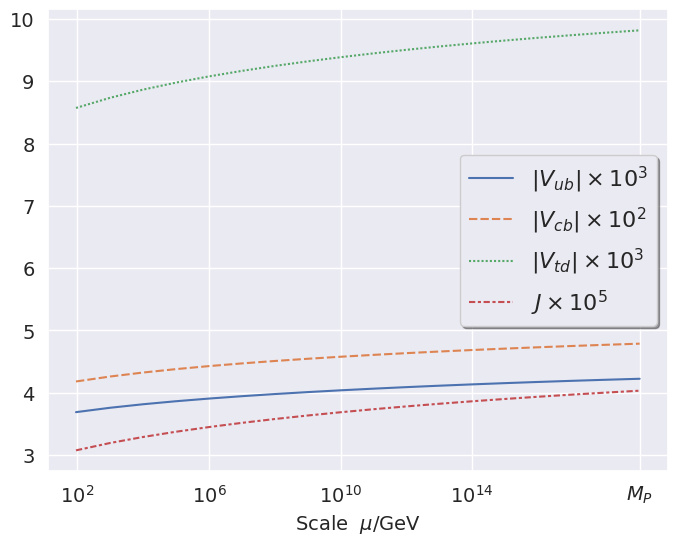

In [58]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=df_ckm_rge.iloc[:, [0, 1, 2, 3]])

plt.xscale('log')
plt.yscale('linear')
ax.set_xticks([10**2, 10**6, 10**10, 10**14, 1.22*10**19])
ax.set_xticklabels(['$10^2$', '$10^6$', '$10^{10}$', '$10^{14}$', '$M_P$'])

ax.legend(loc='best', ncol=1, 
          fancybox=True, shadow=True, fontsize=16, markerscale=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel(r'Scale  $\mu / \mathrm{GeV}$', fontsize=14)

plt.show()

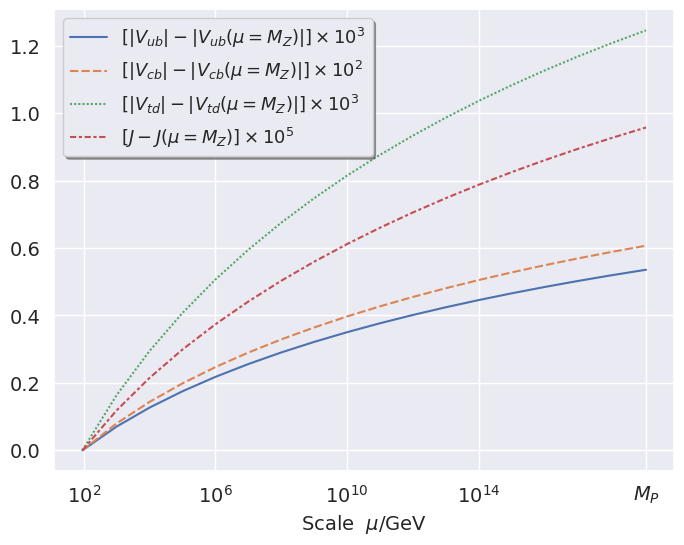

In [59]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=df_ckm_rge.iloc[:, [4, 5, 6, 7]])

plt.xscale('log')
plt.yscale('linear')
ax.set_xticks([10**2, 10**6, 10**10, 10**14, 1.22*10**19])
ax.set_xticklabels(['$10^2$', '$10^6$', '$10^{10}$', '$10^{14}$', '$M_P$'])

ax.legend(loc='best', ncol=1, 
          fancybox=True, shadow=True, fontsize=13, markerscale=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel(r'Scale  $\mu / \mathrm{GeV}$', fontsize=14)

plt.show()

## ML

### I11

In [60]:
dff = df_invariants.sample(50000)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

transform = preprocessing.MinMaxScaler()
transform.fit_transform(dff)

Y = transform.fit_transform(dff)[:,2]
X = dff[['s12', 's13', 's23', 'delta']].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [62]:
regressor.score(X_test, Y_test)

0.8389070851718633

In [63]:
(regressor.feature_importances_)

array([0.03276403, 0.46389577, 0.47381159, 0.0295286 ])

In [64]:
array_FI_estimators = np.array([tree.feature_importances_ for tree in regressor.estimators_])

In [65]:
FI_estimators = pd.DataFrame(array_FI_estimators, columns=['s12', 's13', 's23', 'delta'])
FI_estimators = FI_estimators.reindex(FI_estimators.mean().sort_values(ascending=False).index, axis=1)

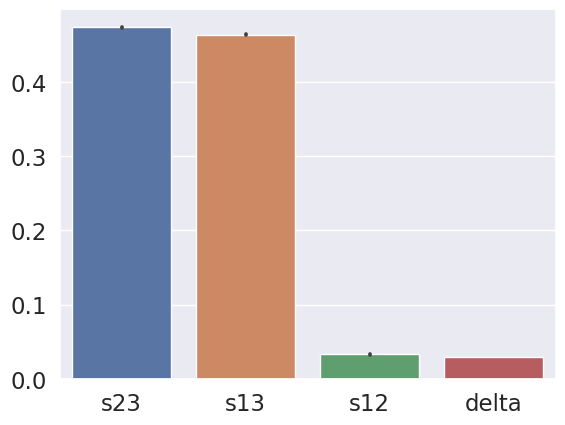

In [66]:
sns.barplot(data=FI_estimators)
plt.show()

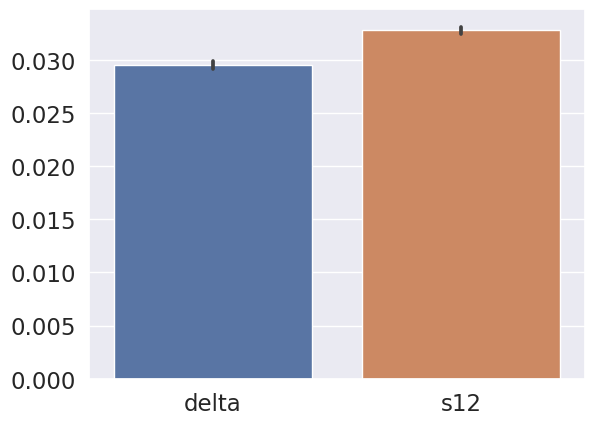

In [67]:
sns.barplot(data=FI_estimators[['delta', 's12']])
plt.show()

### I12

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

transform = preprocessing.MinMaxScaler()
transform.fit_transform(dff)

Y = transform.fit_transform(dff)[:,4]
X = dff[['s12', 's13', 's23', 'delta']].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [69]:
regressor.score(X_test, Y_test)

0.007377874296917941

In [70]:
regressor.predict(X_test)

array([0.46455314, 0.46358643, 0.46074857, ..., 0.46073594, 0.47546256,
       0.46188475])

In [71]:
regressor.feature_importances_

array([0.27278863, 0.2423035 , 0.26835113, 0.21655674])

In [72]:
array_FI_estimators = np.array([tree.feature_importances_ for tree in regressor.estimators_])

FI_estimators = pd.DataFrame(array_FI_estimators, columns=['s12', 's13', 's23', 'delta'])
FI_estimators = FI_estimators.reindex(FI_estimators.mean().sort_values(ascending=False).index, axis=1)

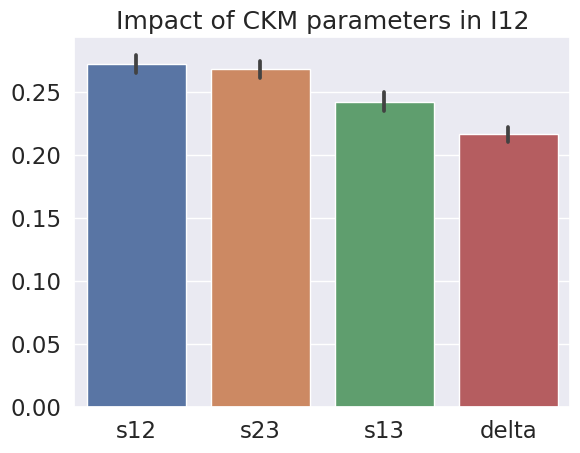

In [73]:
plt.title('Impact of CKM parameters in I12')
sns.barplot(data=FI_estimators)
plt.show()